# Tarea 1 - Problema 3

En la tercera parte de la tarea, se utilizará el dataset "Birds Songs Numeric DataSet", el cual se puede obtener del siguiente link de Kaggle: https://www.kaggle.com/fleanend/birds-songs-numeric-dataset. La tarea sera reconocer la especie de pájaro que canta, basándose en información numérica del respectivo canto. El dataset está compuesto de 88 especies.

Información del dataset obtenida de Kaggle:
* Existen 88 tipo de especies
* El training set está balanceado, mientras el test set carece de algunas especies y tiene exceso de otras.

### 3.a Carga de datos
Cargue los datos a un DataFrame. Elimine las columnas indicadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

df_train = pd.read_csv("train.csv")                         # Carga train set
df_test  = pd.read_csv("test.csv")                          # Carga test set
features = list(df_train.columns)
features.remove('id')                                 # Remueve columnas señaladas
features.remove('genus')
features.remove('species')

# X Train set filtradas
x_tr = df_train[features]                                

# X test set filtradas
x_tst  = df_test[features]

Es importante destacar que el conjunto de validación se extraerá del train set, mientras el test set se dejará estático

### 3.b Procesamiento de datos y visualización

i) una especie totalmente clasificada requiere género (genus) y especie (species) del pájaro en cuestión. Cree el target considerando ambas variables

In [2]:
# Obtención Target y_tr
y_tr = df_train["genus"]+'+'+df_train["species"]
target_train = y_tr.drop_duplicates()

In [3]:
# Obtención Target y_tst
y_tst = df_test["genus"]+'+'+df_test["species"]
target_test = y_tst.drop_duplicates()

In [4]:
# Cantidad de ejemplos por clase en train set
pd.DataFrame({'id':df_train['id'],'Class':y_tr}).groupby('Class')['id'].nunique()

Class
Acanthis+flammea              20
Acrocephalus+palustris        20
Acrocephalus+schoenobaenus    20
Acrocephalus+scirpaceus       20
Aegithalos+caudatus           20
                              ..
Troglodytes+troglodytes       20
Turdus+iliacus                20
Turdus+merula                 20
Turdus+philomelos             20
Vanellus+vanellus             20
Name: id, Length: 88, dtype: int64

In [5]:
# Cantidad de ejemplos por clase en test set
pd.DataFrame({'id':df_test['id'],'Class':y_tst}).groupby('Class')['id'].nunique()

Class
Acanthis+flammea                36
Acrocephalus+palustris          52
Acrocephalus+schoenobaenus    1029
Acrocephalus+scirpaceus        484
Aegithalos+caudatus            112
                              ... 
Troglodytes+troglodytes        164
Turdus+iliacus                  53
Turdus+merula                  191
Turdus+philomelos              202
Vanellus+vanellus               95
Name: id, Length: 87, dtype: int64

**Comentarios**: Como se puede ver en lo anterior, las clases en el train set están equiparadas pero no así para el test set. Además, para el test set le falta una clase.

iii) Analice los datos de la manera que estime conveniente para decidir el pre-procesamiento a seguir (estandarización de todas la variables o sólo algunas variables, normalización, no pre-procesar, etc...). **Justifique el pre-procesamiento escogido. Incluya gráficos en su análisis**

**Variables sin pre-procesar**

In [6]:
# Parámetros estadísticos de los datos por cada atributo
x_tr.describe()

,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_11,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,0.291917,0.306551,0.291574,0.301237,0.283063,0.294703,0.305566,0.280168,0.285835,0.276192,...,1982.457315,1995.389395,1968.590667,1944.963480,1934.595458,1940.109519,1938.828834,1938.228428,1948.568320,1924.264813
std,0.362506,0.358943,0.354520,0.363461,0.353654,0.354899,0.375651,0.353620,0.355599,0.345347,...,797.349287,818.543038,853.903981,832.736297,818.874028,806.448221,807.842071,821.000939,825.829557,817.049892
min,0.000017,0.000016,0.000007,0.000046,0.000072,0.000014,0.000015,0.000019,0.000009,0.000007,...,157.418552,202.732189,268.035686,271.893309,298.141412,193.561748,240.695106,153.893940,116.453948,111.880162
25%,0.006962,0.004600,0.004271,0.004824,0.007915,0.003739,0.004335,0.003702,0.005823,0.004431,...,1374.759563,1372.967948,1381.742149,1362.903805,1314.859972,1326.162445,1286.622864,1310.659274,1317.503857,1318.225472
50%,0.087766,0.106017,0.084788,0.073316,0.074953,0.108833,0.088395,0.096868,0.079534,0.078684,...,1938.104111,1946.453375,1946.039527,1919.745187,1889.685390,1910.827490,1937.955145,1955.964272,1943.068335,1964.999703
75%,0.539989,0.616589,0.559515,0.610154,0.519957,0.551657,0.618742,0.526539,0.548122,0.514998,...,2530.286218,2527.348258,2512.180699,2473.308467,2458.923442,2467.536482,2508.283689,2473.870917,2514.167811,2504.498187
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4257.810889,4278.924816,4378.851746,4308.174330,4236.129008,4250.569545,4244.840775,4221.045257,4162.869011,4166.367835


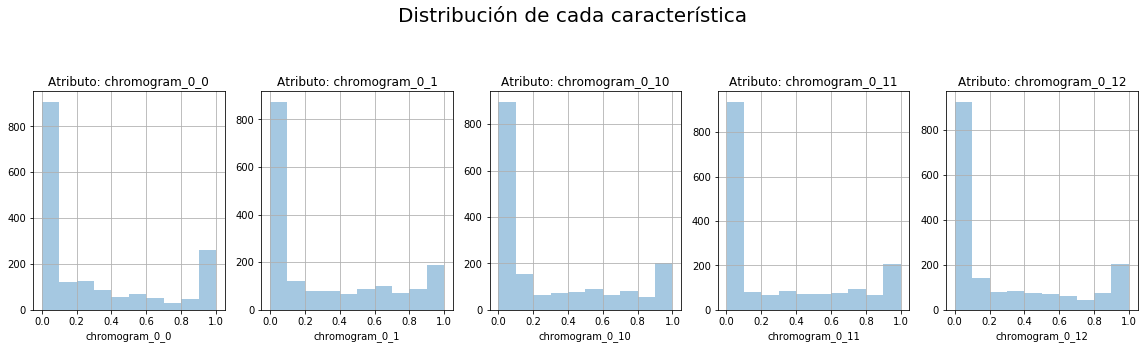

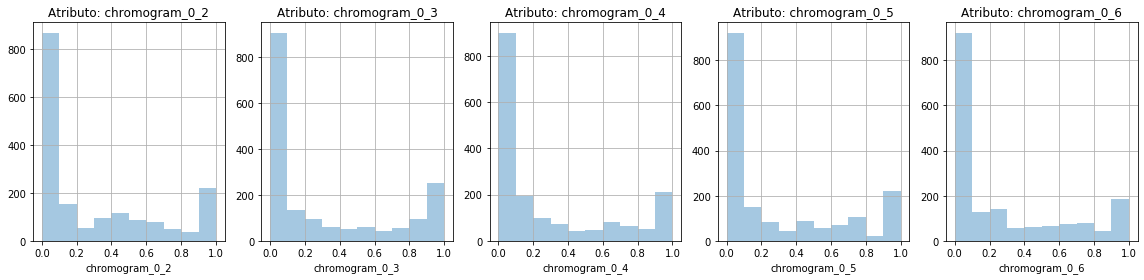

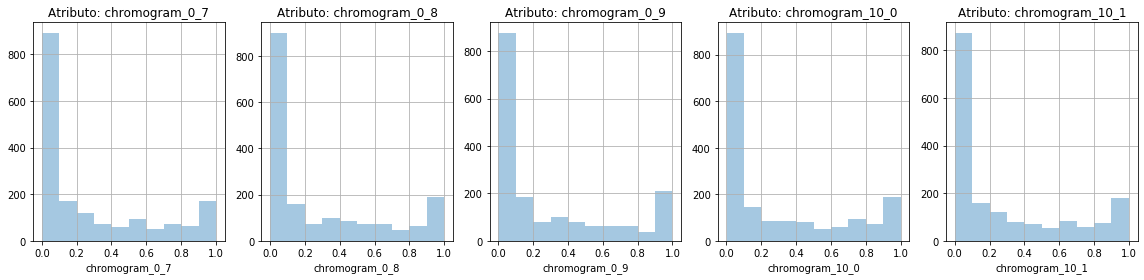

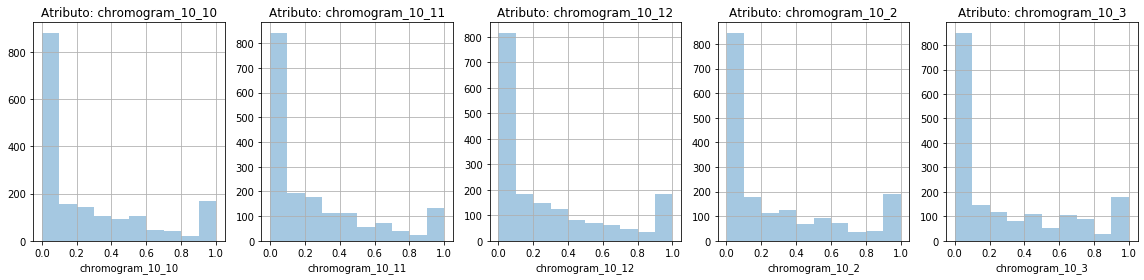

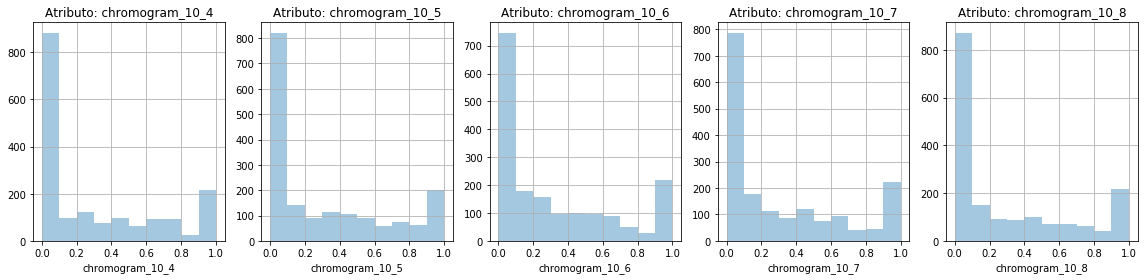

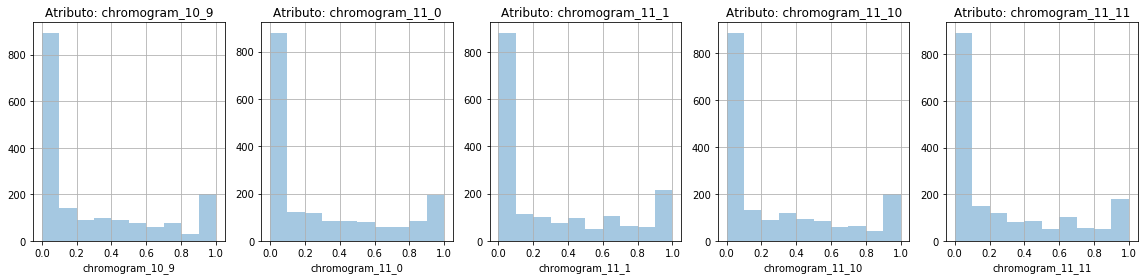

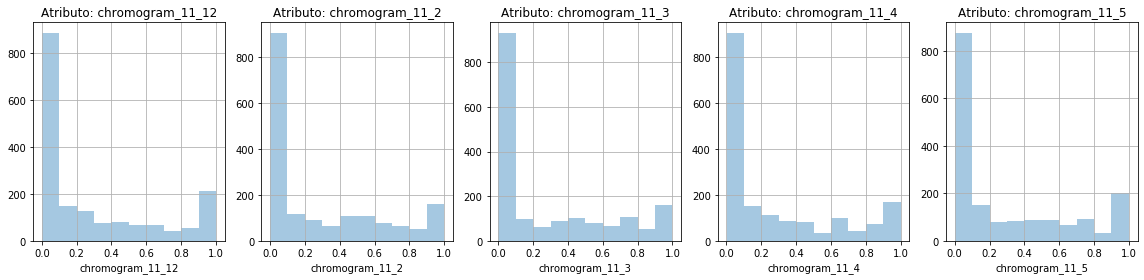

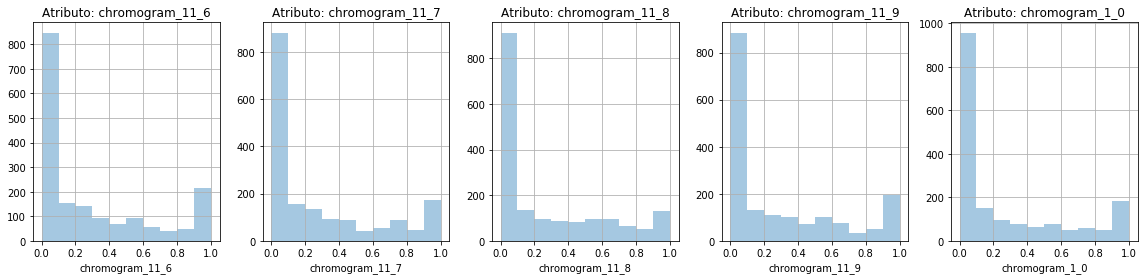

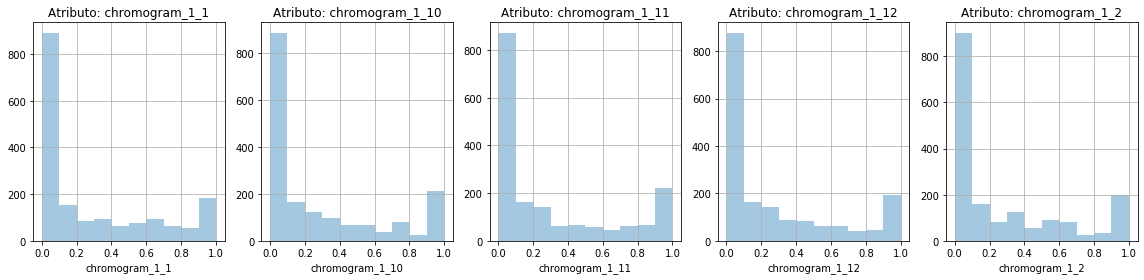

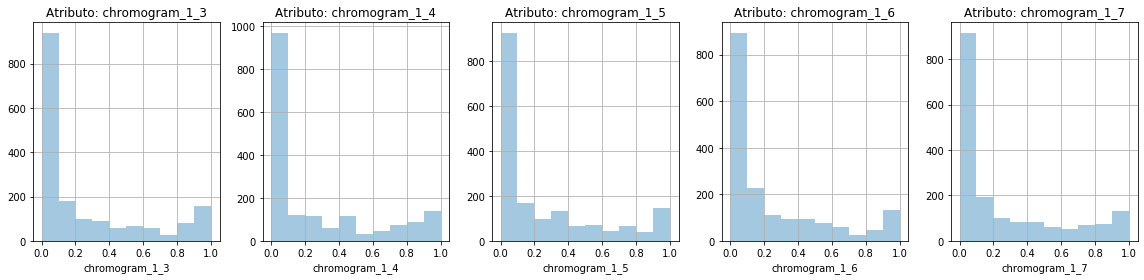

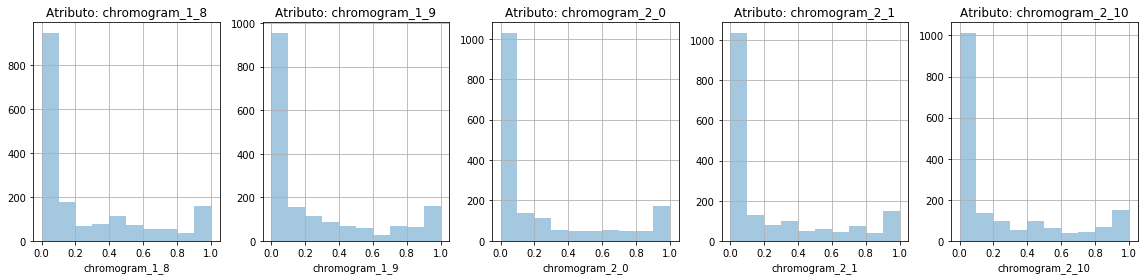

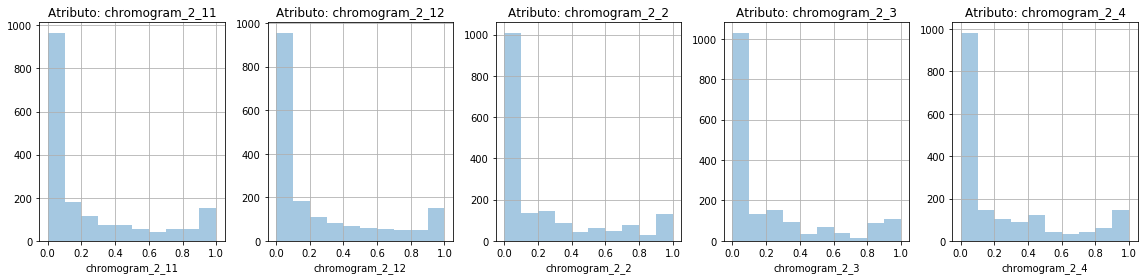

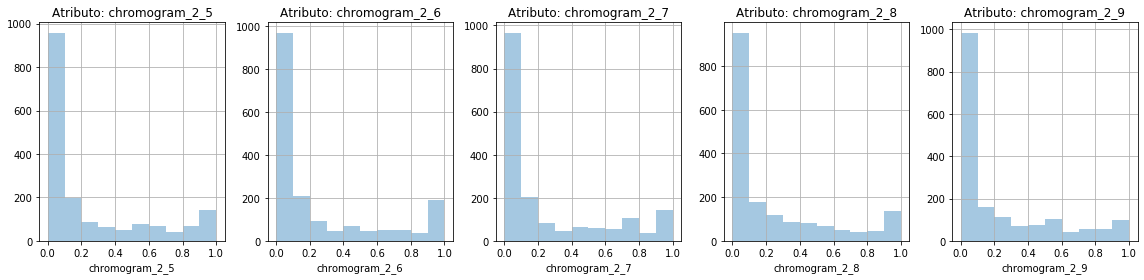

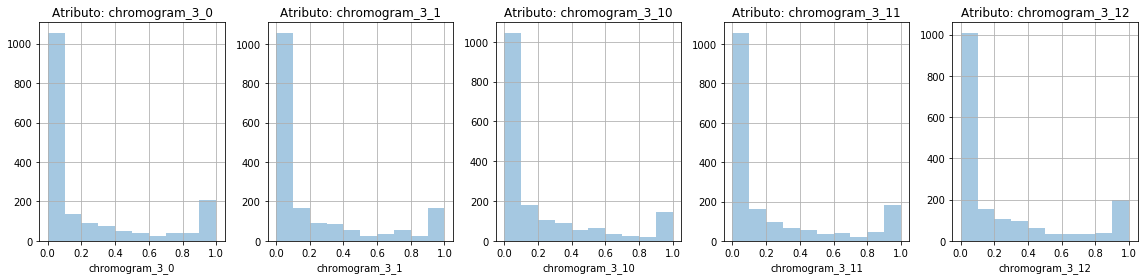

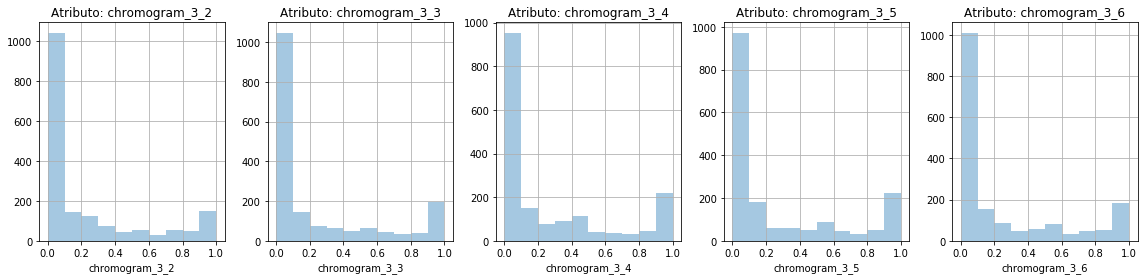

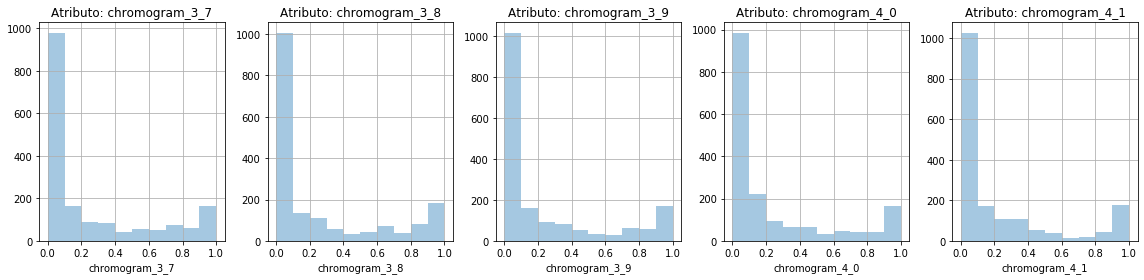

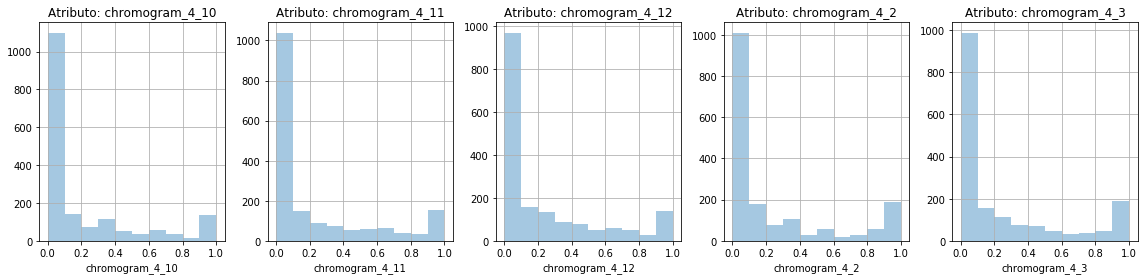

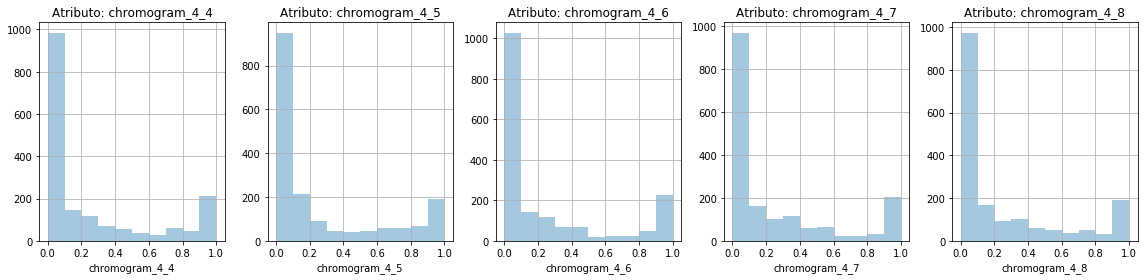

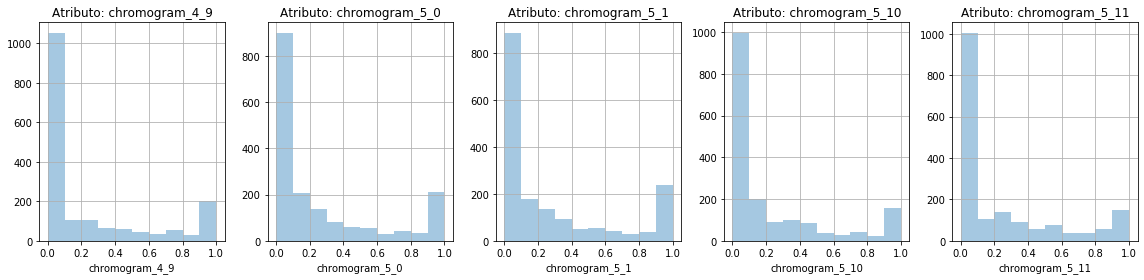

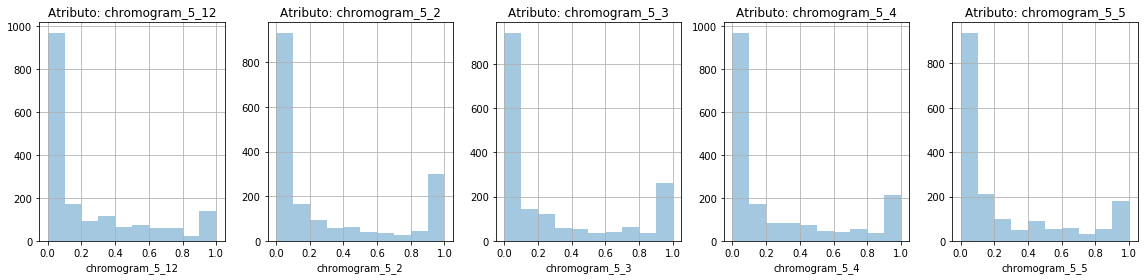

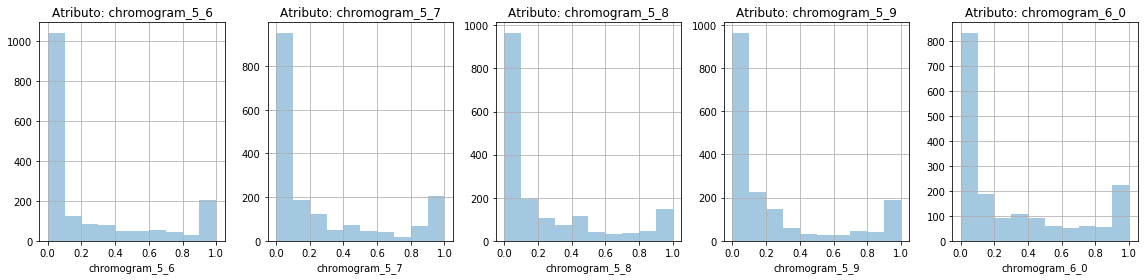

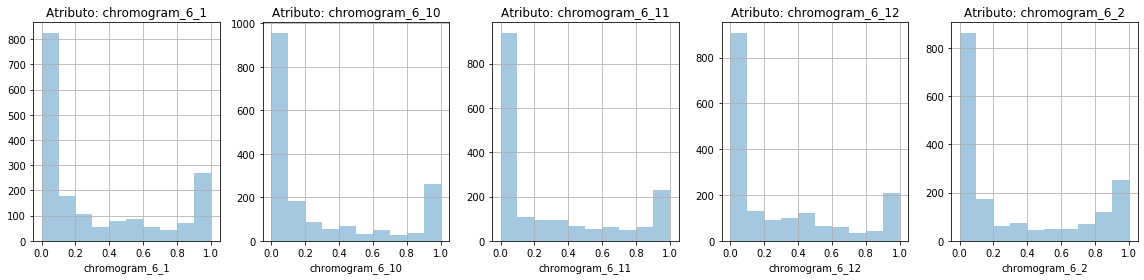

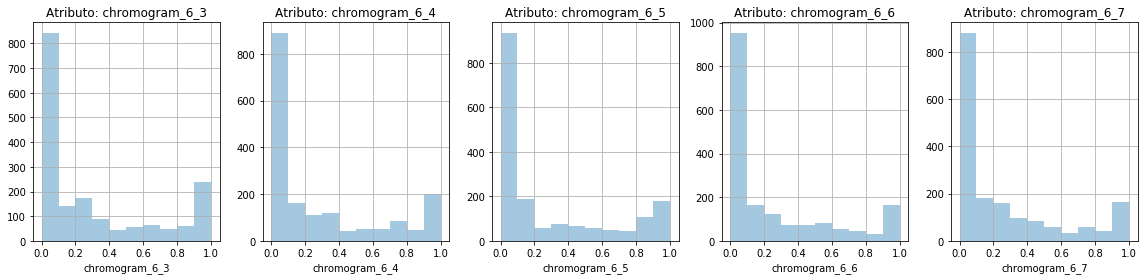

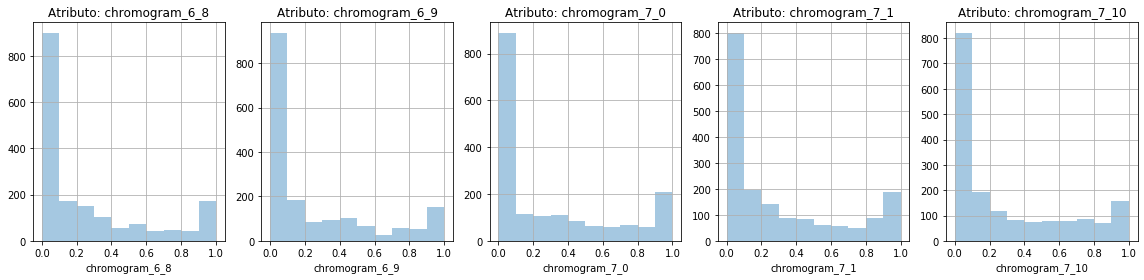

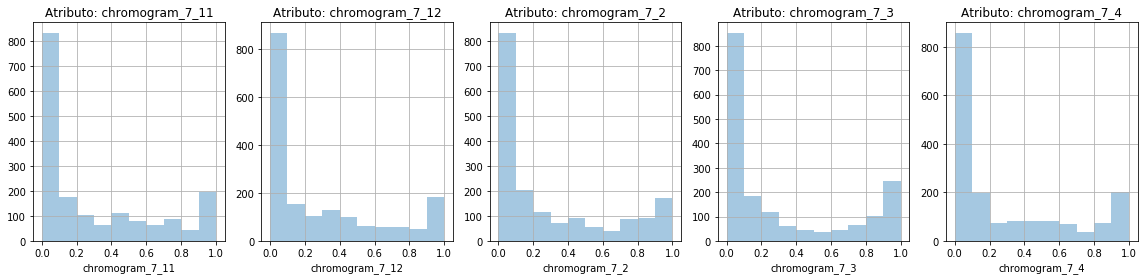

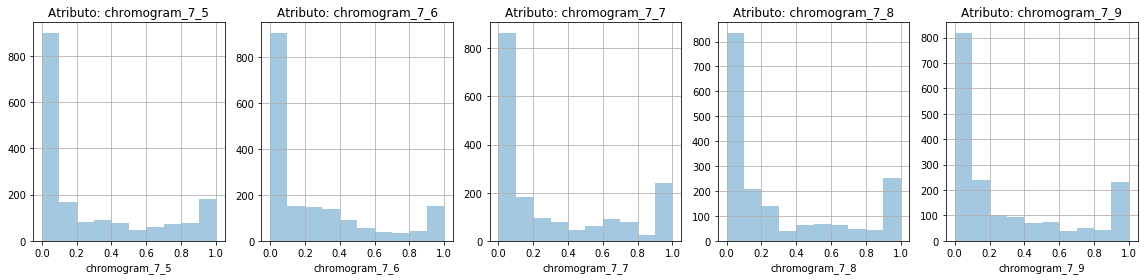

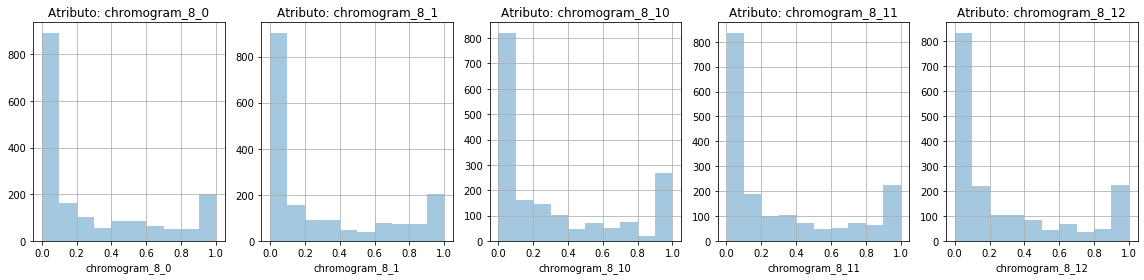

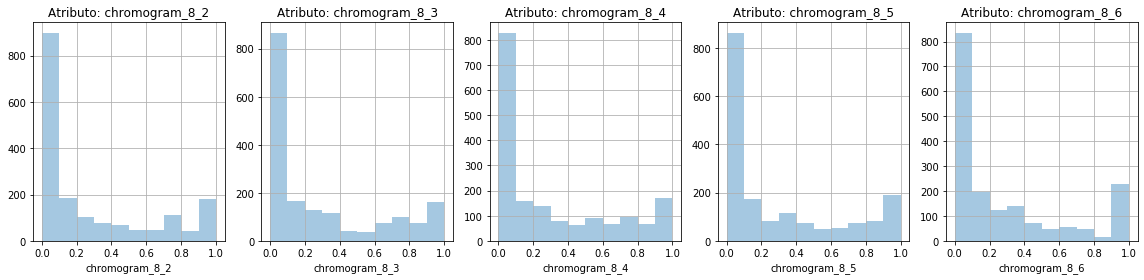

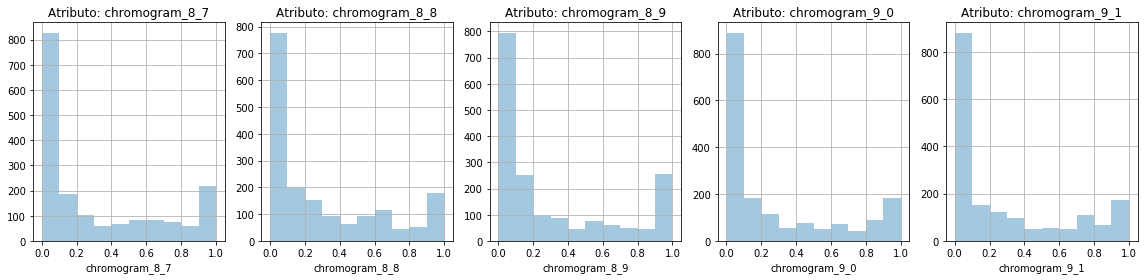

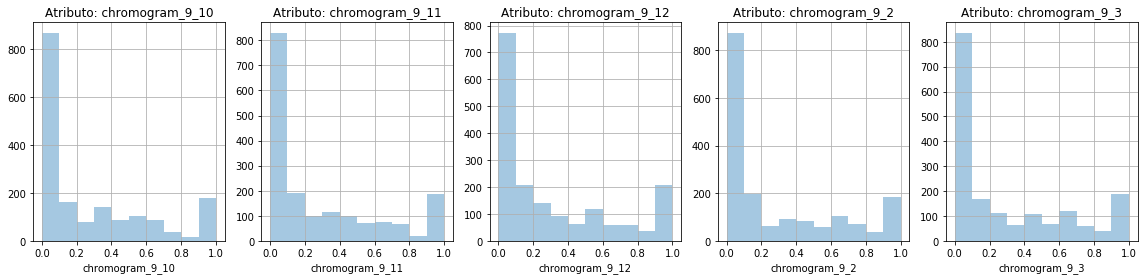

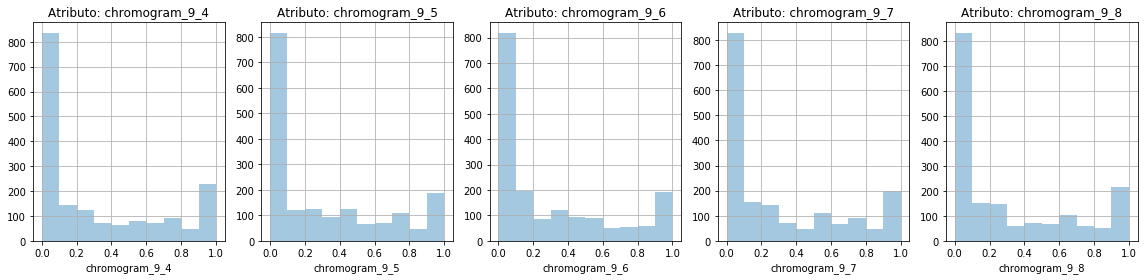

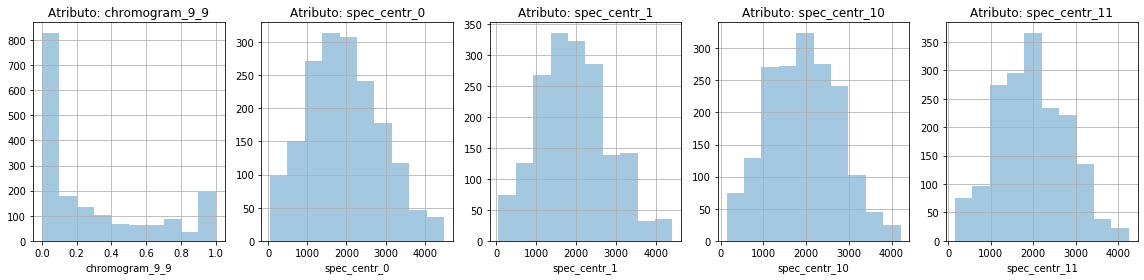

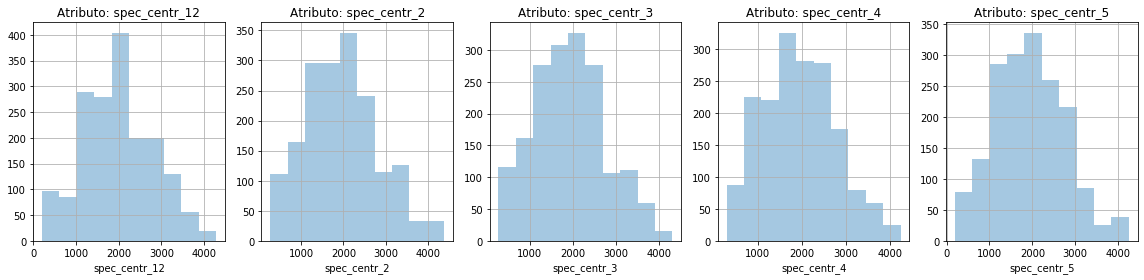

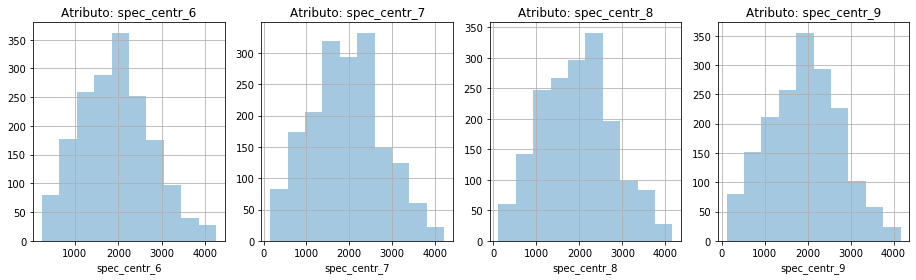

In [7]:
plt.rcParams['figure.figsize']=[16,4]                        # Controla el tamaño del plot dentro del Notebook

x_tr_pre1=x_tr.astype(float)

plt.suptitle('Distribución de cada característica',size=20,y=1.2)
k=1
for i in x_tr_pre1.columns[:]:
    plt.subplot(1,5,k)
    plt.title('Atributo: '+str(i))
    sns.distplot(x_tr_pre1[i],kde=False, bins=10)
    plt.tight_layout()
    plt.grid()
    if k==5:
        k=1
        plt.show()
    else:
        k+=1

**Comentarios:** Como se puede apreciar todos los atributos Chromogram_i_j están distribuidos entre 0 y 1, mientras que los atributos spec_centr_k tienen valores del orden de miles. Es necesario realizar un pre-procesamiento de datos porque en caso contrario, las atributos chromogram no tendrán el peso necesario sobre el entranemiento del modelo.

Se puede ver que los atributos Chromogram_i_j se distribuyen de formas similares y la mayor cantidad de datos se concentran en un rango de 0.1, mientras que el resto de los datos tiene poca frecuencia comparada con los datos concentrados en la primera barra del gráfico. Los atributos Spec_center_k en general se distribuyen de forma "normal" y la frecuencia de los datos es mucho menor. Por lo que se confirma la necesidad de un pre-procesamiento. 

**Variables Pre-Procesadas: Estandarizadas**

In [8]:
# Estandarización de los Datos

# Estandarización de x_tr
x_tr_pre2=x_tr.astype(float)
scaler_x = StandardScaler()
scaler_x.fit(x_tr_pre2.values)
x_tr_st=pd.DataFrame(scaler_x.transform(x_tr_pre2.values),columns=x_tr_pre2.columns)  # x_tr estandarizado

# Estandarización de x_tst
x_tst_pre2=x_tst.astype(float)
scaler_x = StandardScaler()
scaler_x.fit(x_tst_pre2.values) 
x_tst_st=pd.DataFrame(scaler_x.transform(x_tst_pre2.values),columns=x_tr_pre2.columns) # x_tst estandarizado

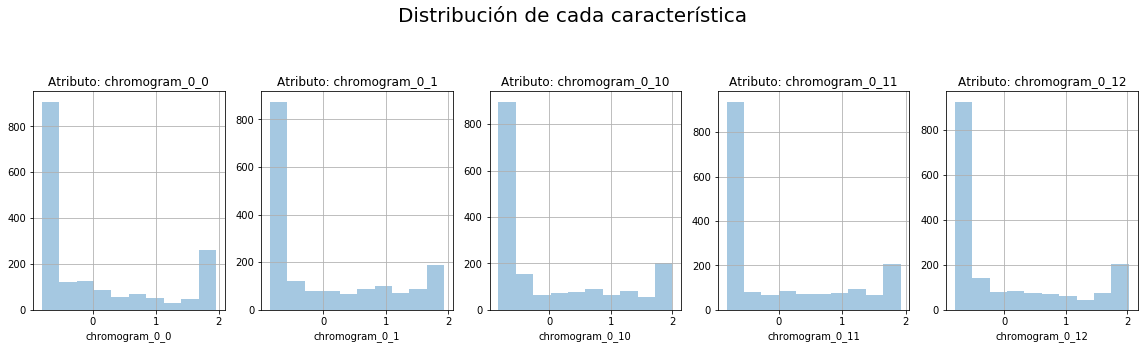

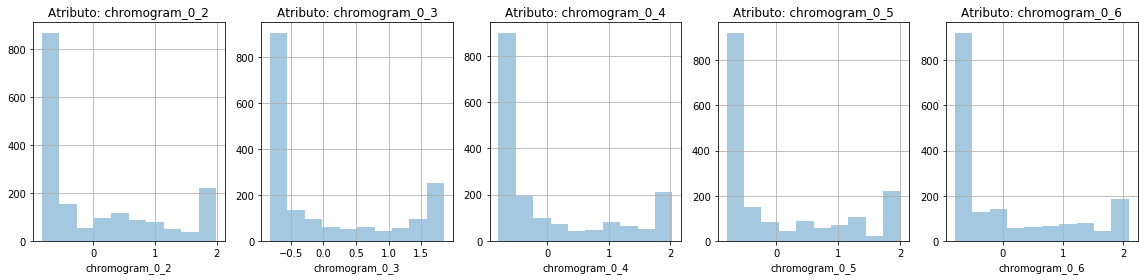

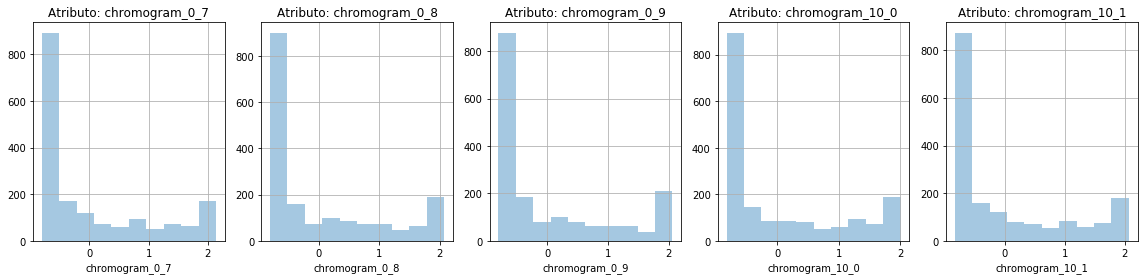

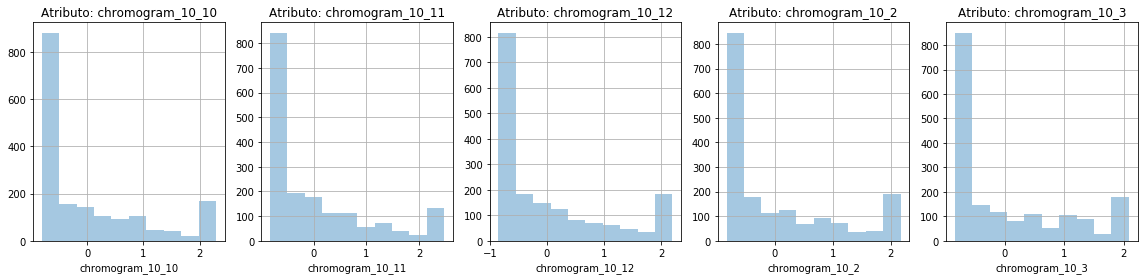

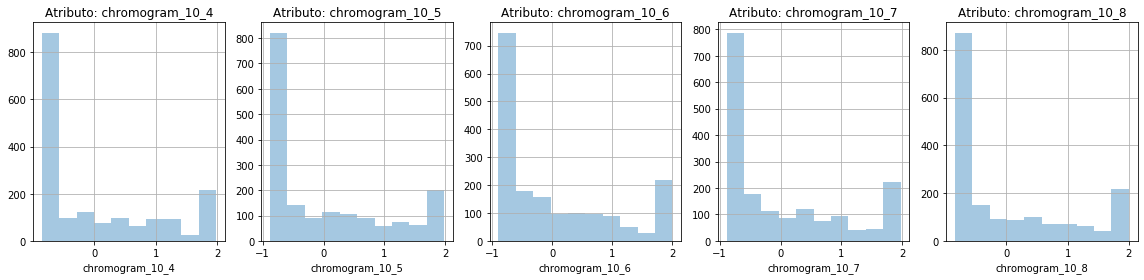

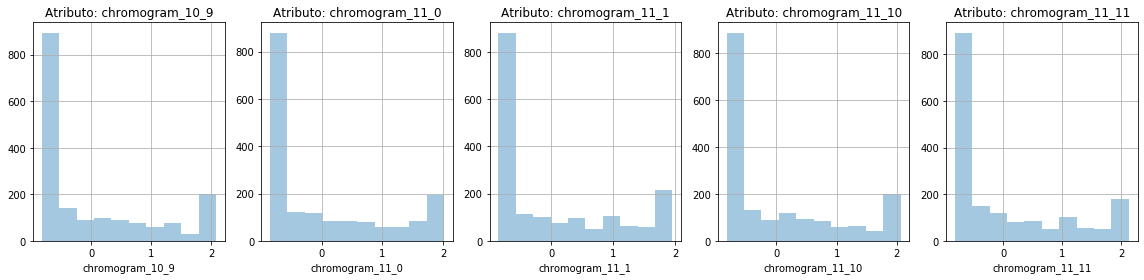

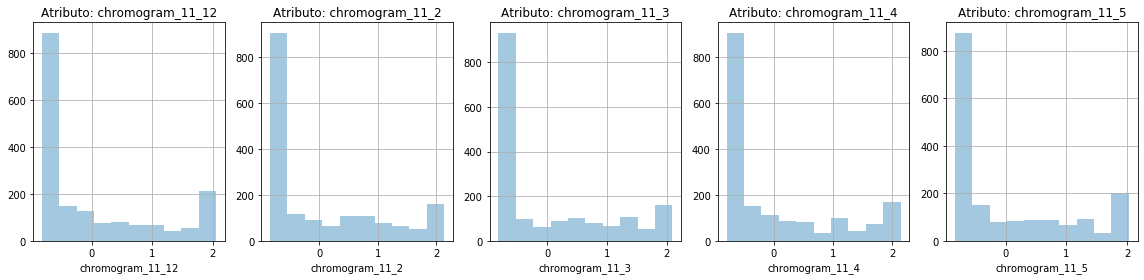

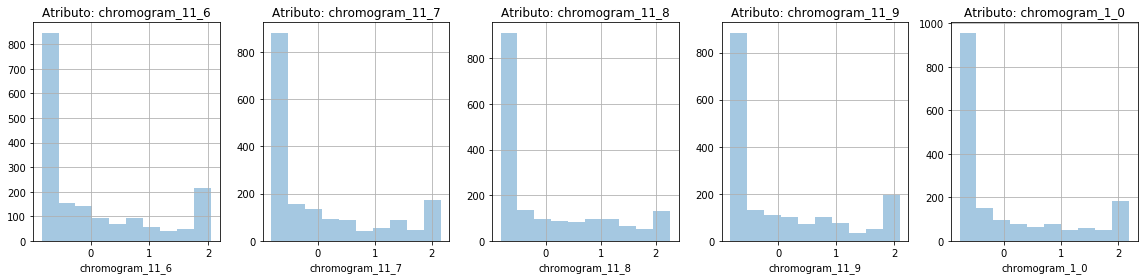

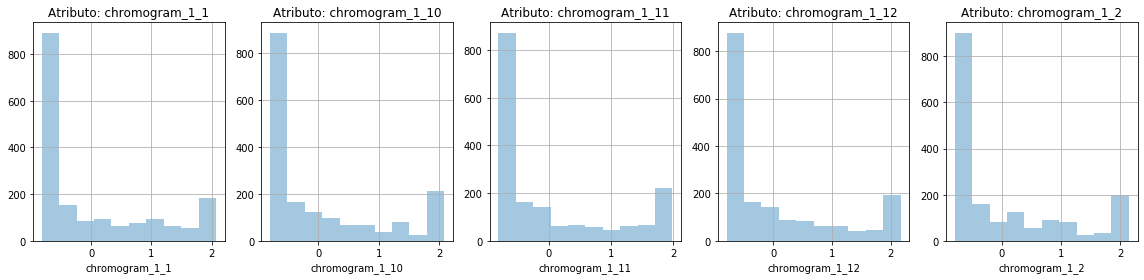

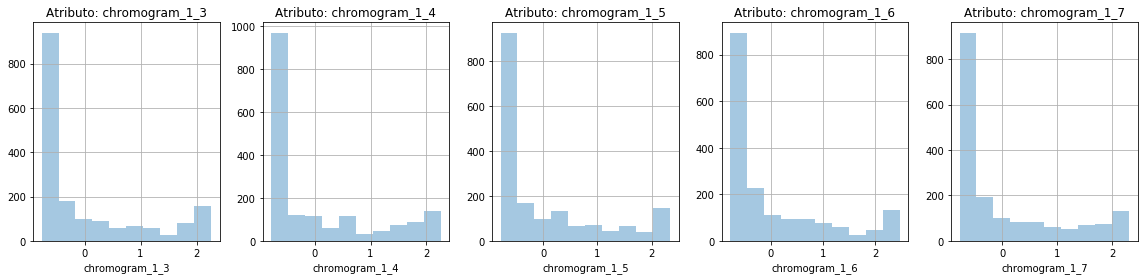

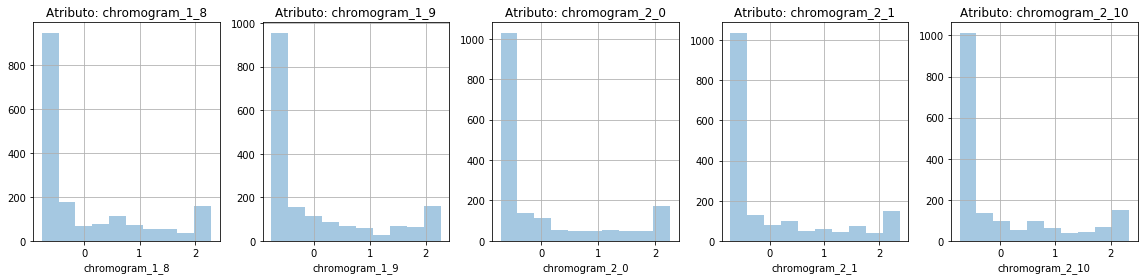

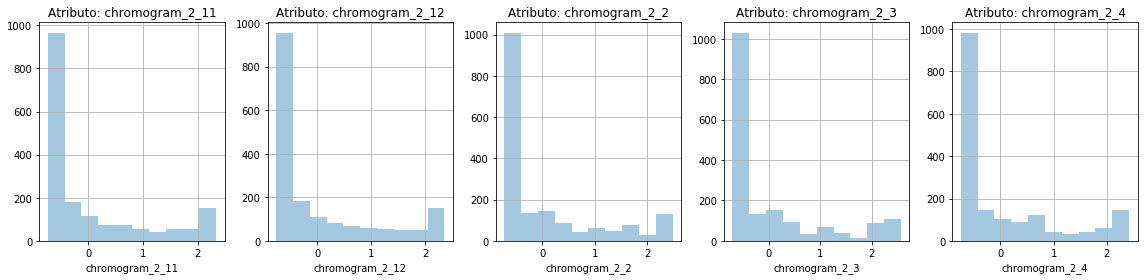

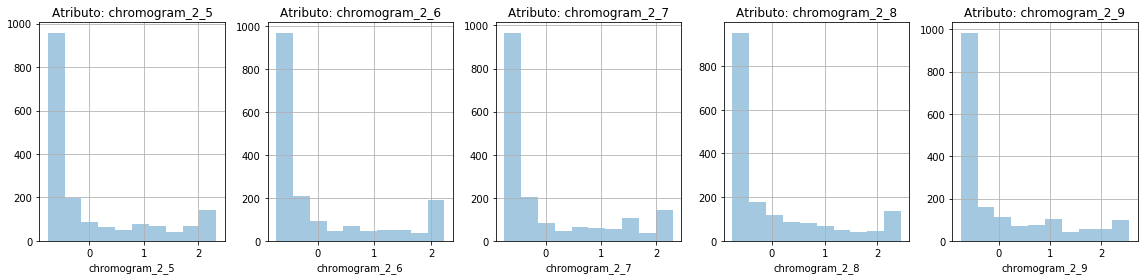

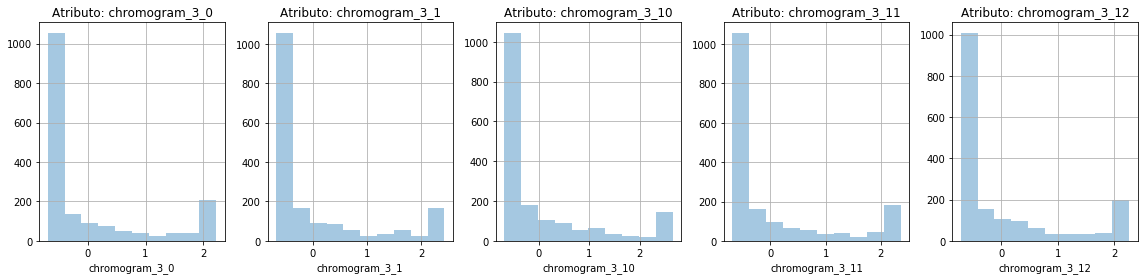

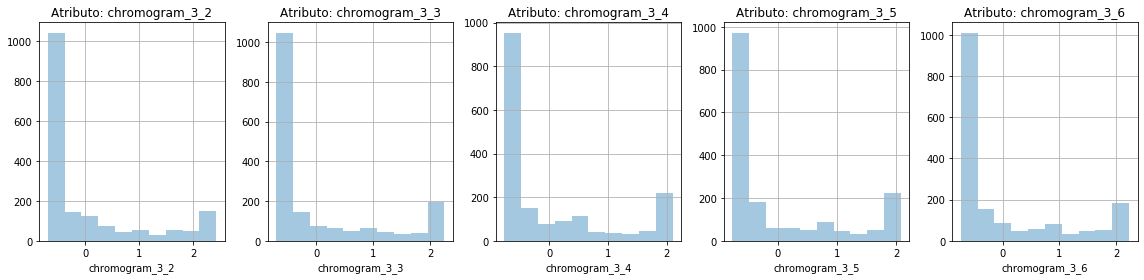

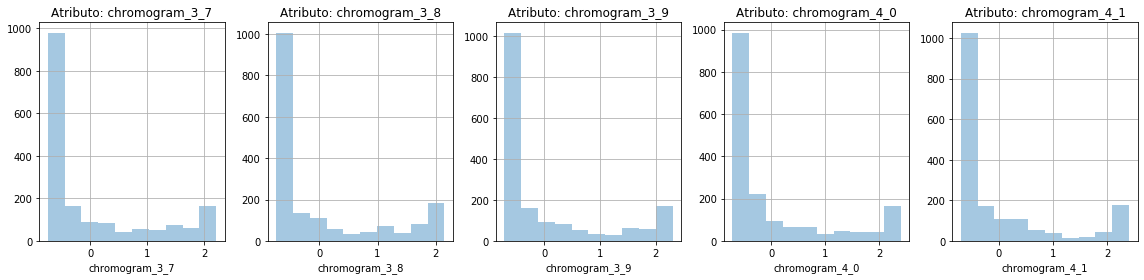

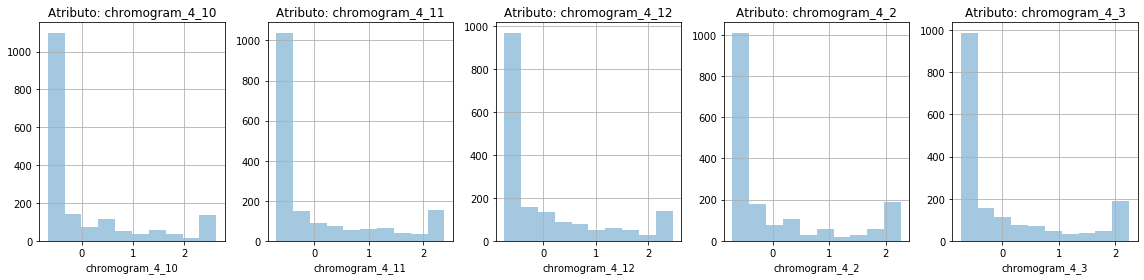

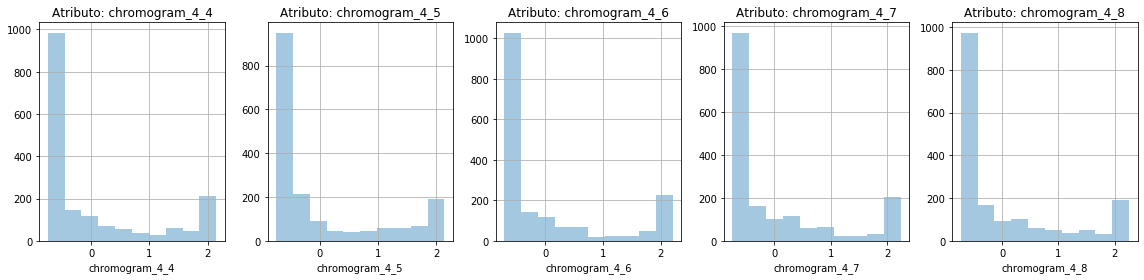

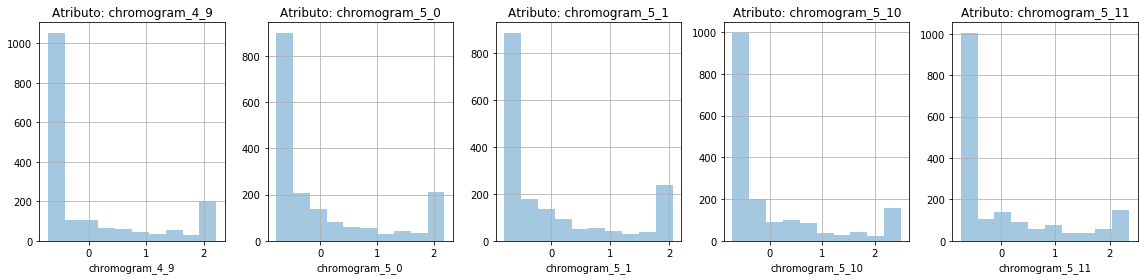

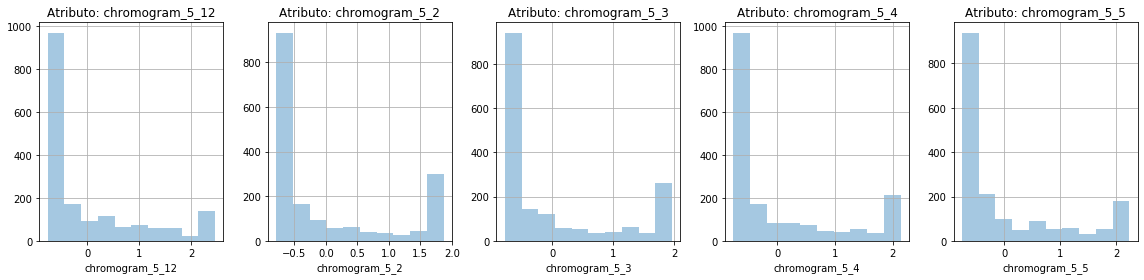

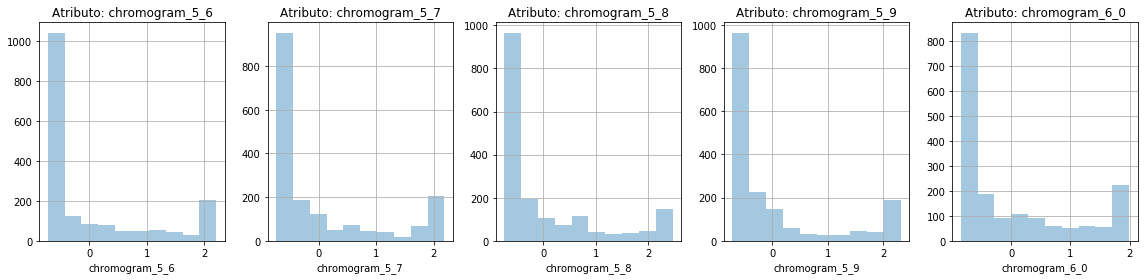

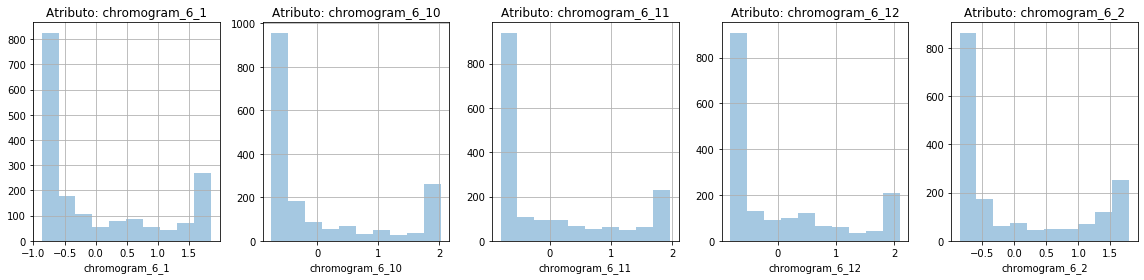

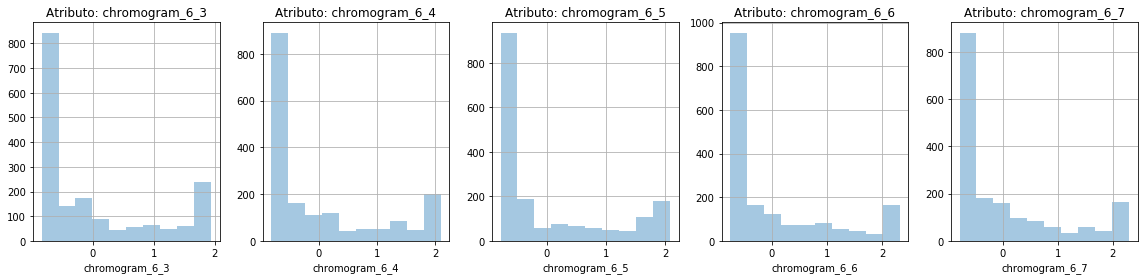

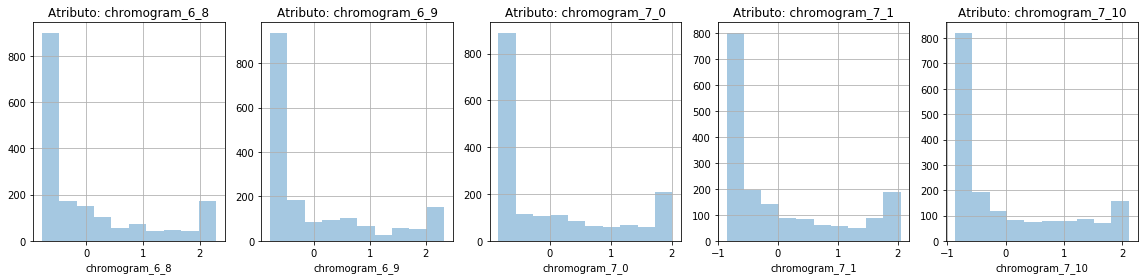

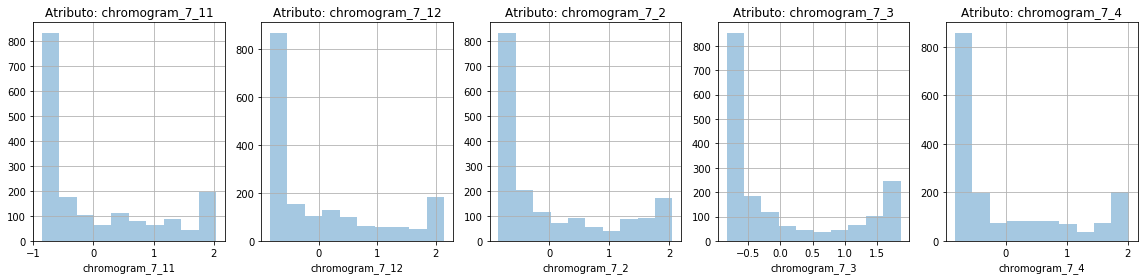

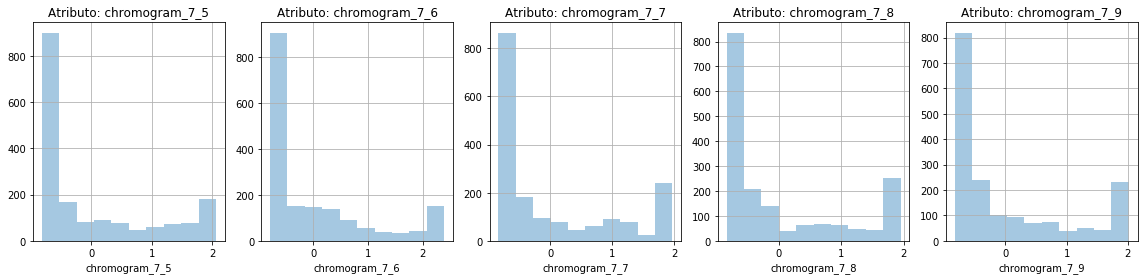

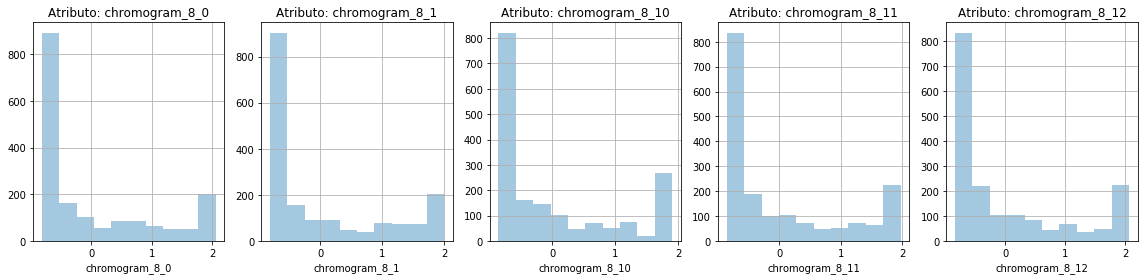

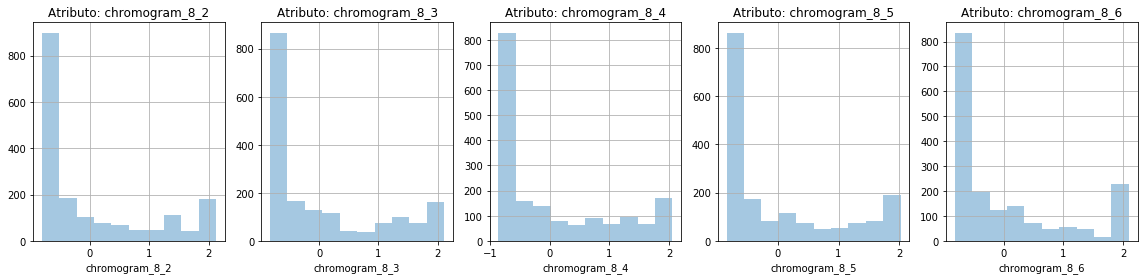

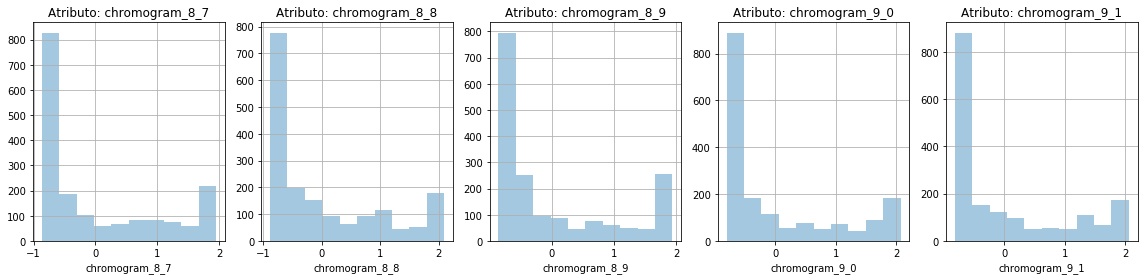

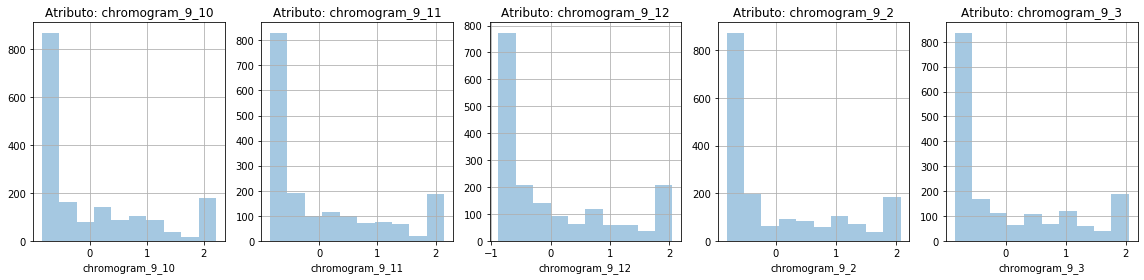

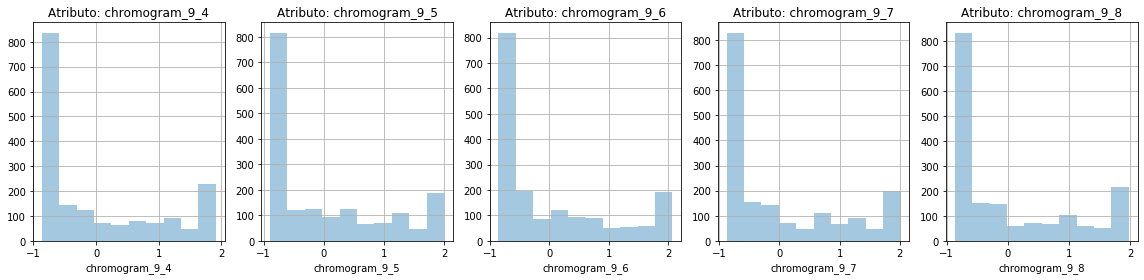

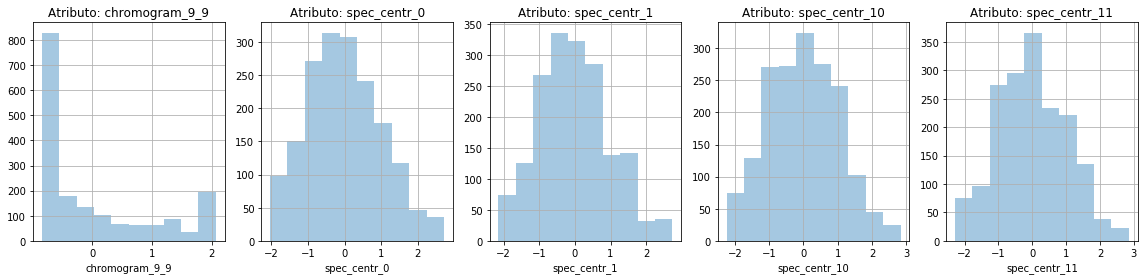

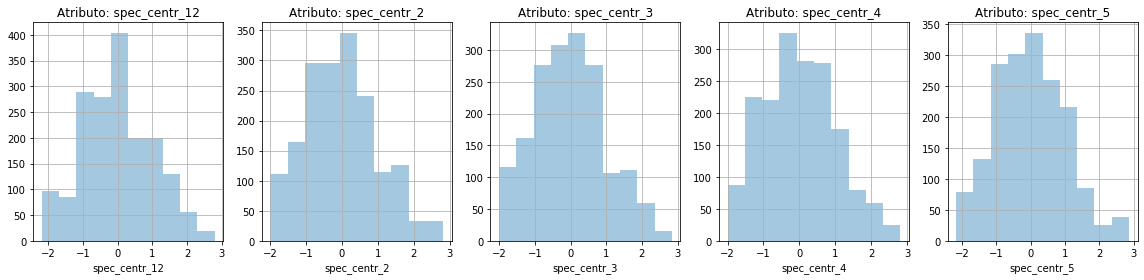

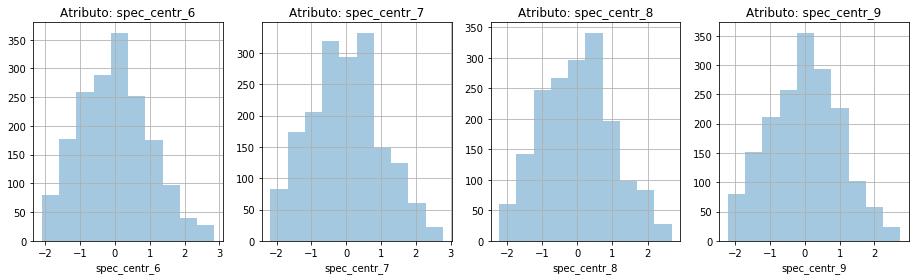

In [9]:
# Gráfico de histogramas de datos estandarizados
plt.rcParams['figure.figsize']=[16,4]                        # Controla el tamaño del plot dentro del Notebook

x_tr_pre2=x_tr_st.astype(float)

plt.suptitle('Distribución de cada característica',size=20,y=1.2)
k=1
for i in x_tr_pre2.columns[:]:
    plt.subplot(1,5,k)
    plt.title('Atributo: '+str(i))
    sns.distplot(x_tr_pre2[i],kde=False, bins=10)
    plt.tight_layout()
    plt.grid()
    if k==5:
        k=1
        plt.show()
    else:
        k+=1

**Comentarios:** Se confirma la distribución de los datos, donde los atributos spec_centr_k tienen una distribución "normal", mientras que para los atributos chromogram_i_j siguen concentrados de la forma mencionada. También se puede ver que la estandarización para los atributos Chromogram_i_j no se ve altamente modificados.

**Variables Sepc_centr_k Estandarizadas**

In [10]:
# Estandarización solo de atributos Spec_centr_k

# Estandarización de x_tr
x_tr_pre3=x_tr.astype(float)
scaler_x = StandardScaler()
scaler_x.fit(x_tr_pre3.iloc[:,-13:].values)
spec1 = pd.DataFrame(scaler_x.transform(x_tr_pre3.iloc[:,-13:].values),columns=x_tr_pre3.iloc[:,-13:].columns)
x_tr_pre3[x_tr_pre3.iloc[:,-13:].columns]=spec1
x_tr_st1 = x_tr_pre3                                                # x_tr estandarizando spec_centr_k

# Estandarización de x_tst
x_tst_pre3=x_tst.astype(float)
scaler_x = StandardScaler()
scaler_x.fit(x_tst_pre3.iloc[:,-13:].values)
spec2 = pd.DataFrame(scaler_x.transform(x_tst_pre3.iloc[:,-13:].values),columns=x_tst_pre3.iloc[:,-13:].columns)
x_tst_pre3[x_tst_pre3.iloc[:,-13:].columns]=spec2
x_tst_st1 = x_tst_pre3                                              # x_tst estandarizando spec_centr_k

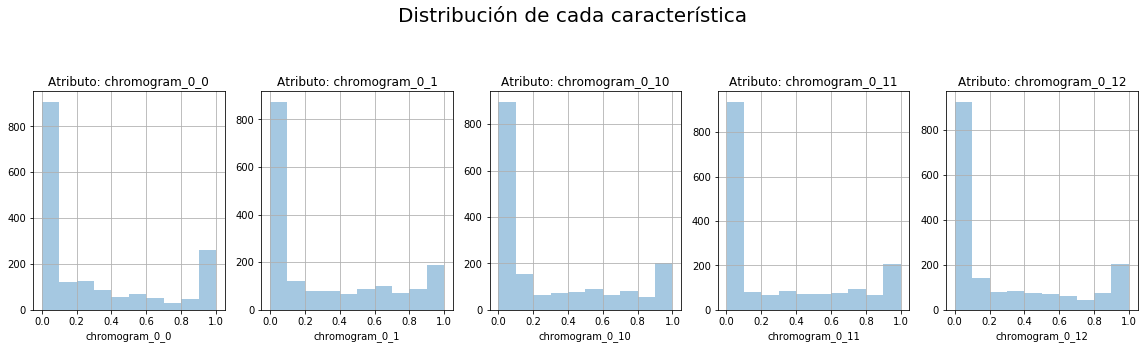

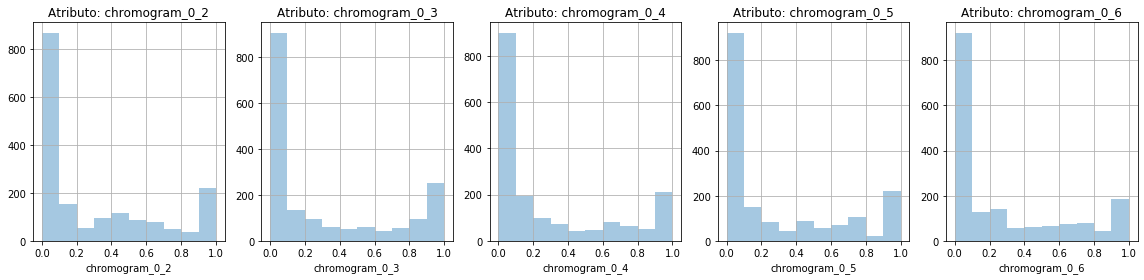

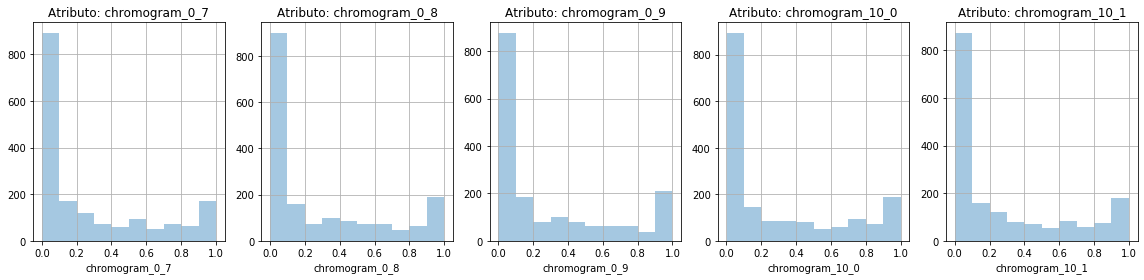

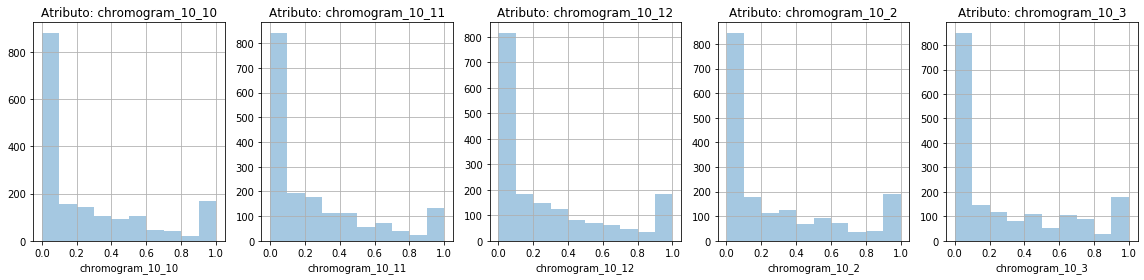

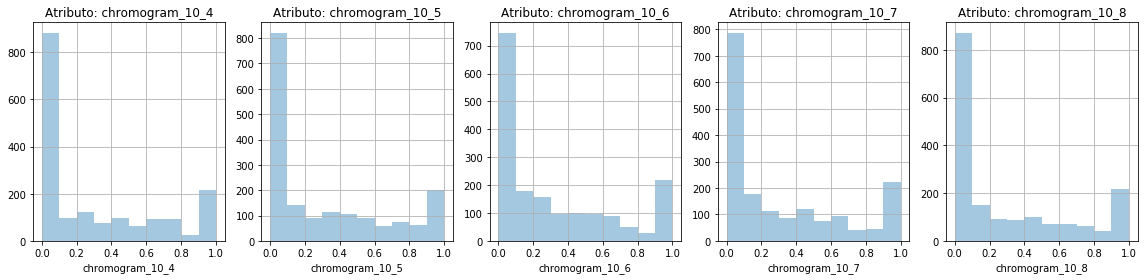

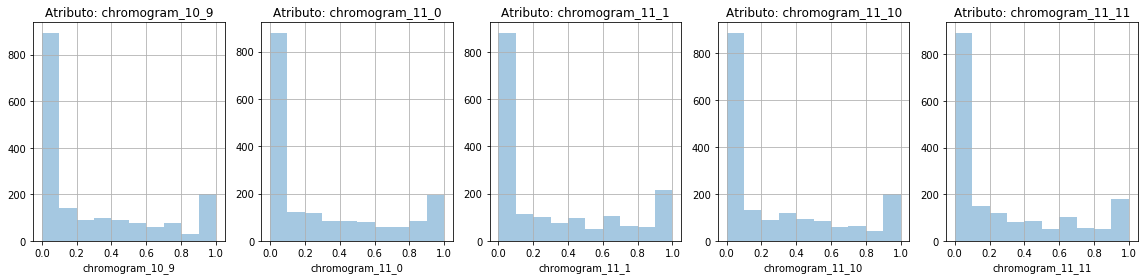

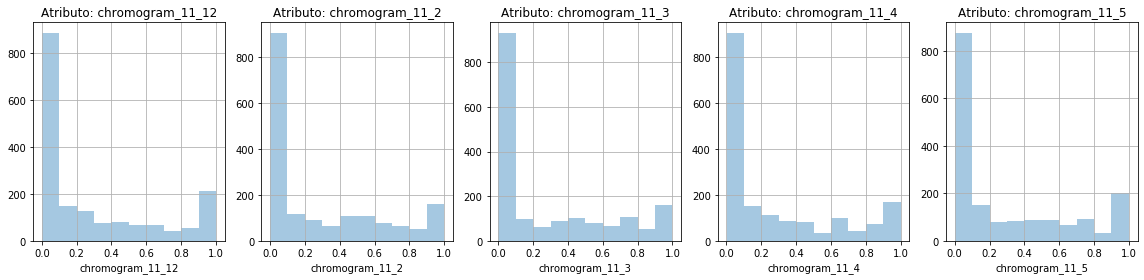

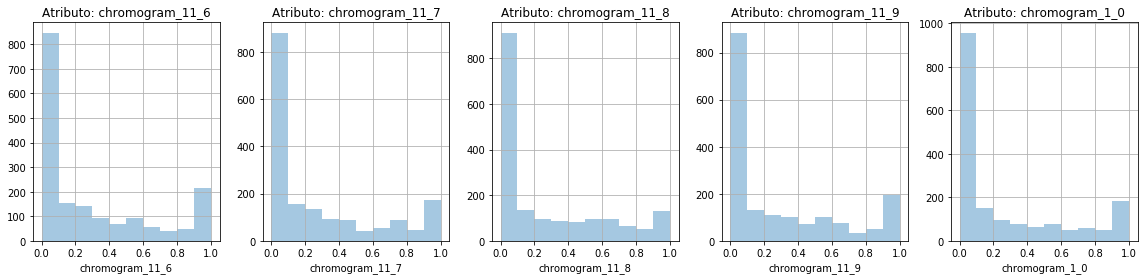

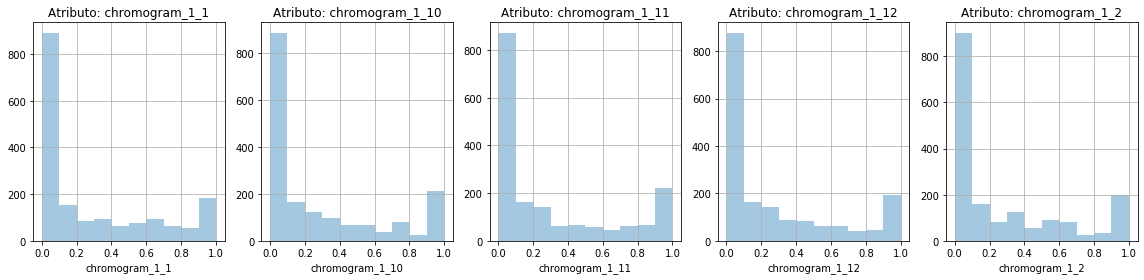

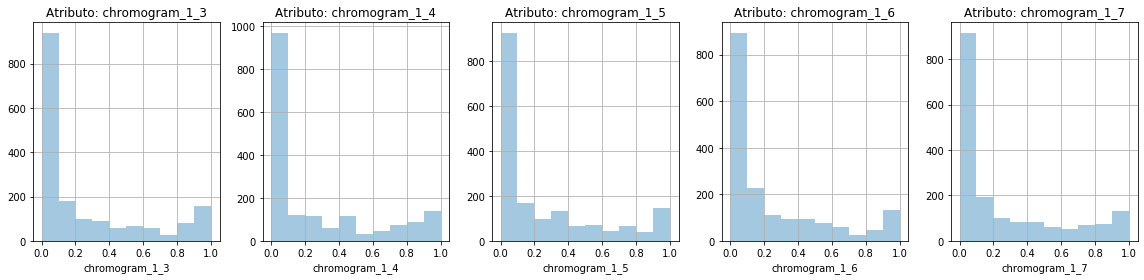

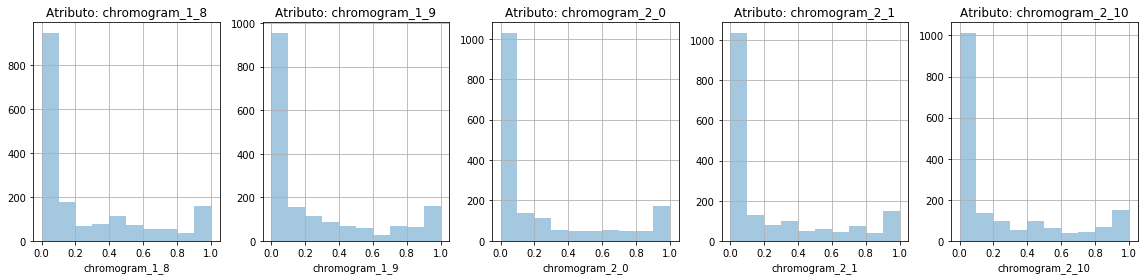

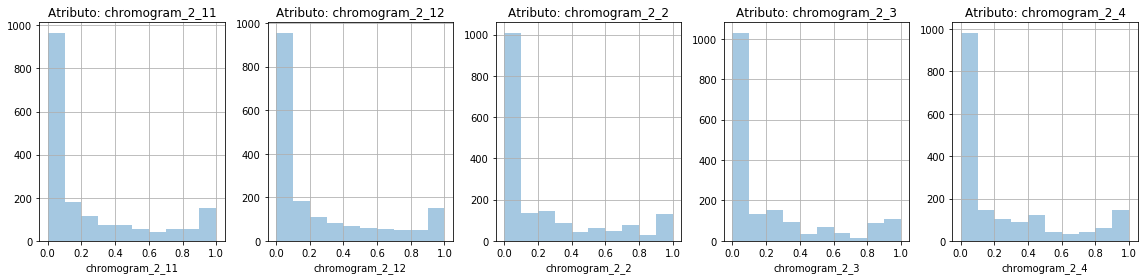

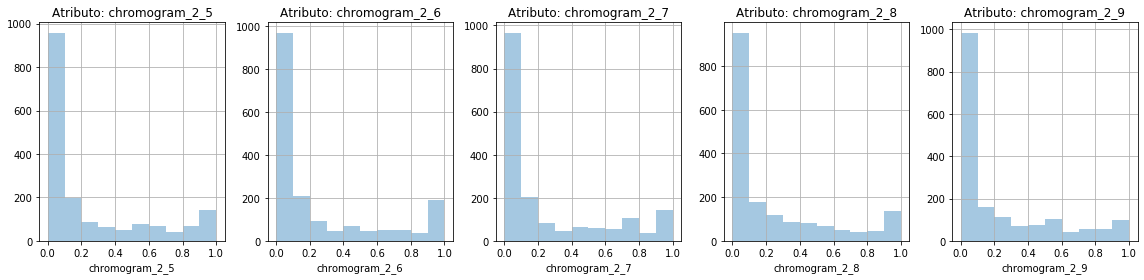

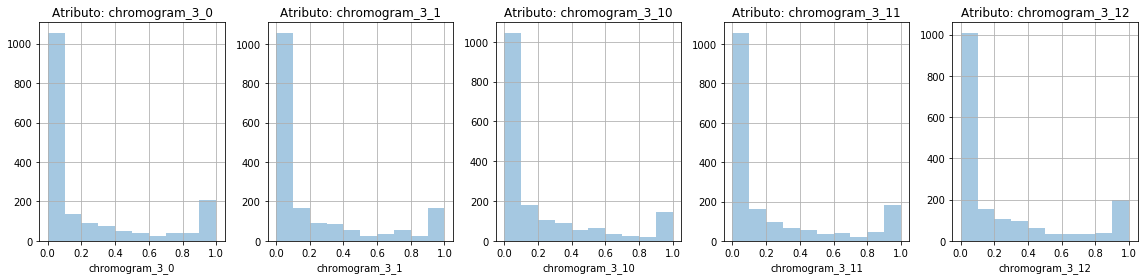

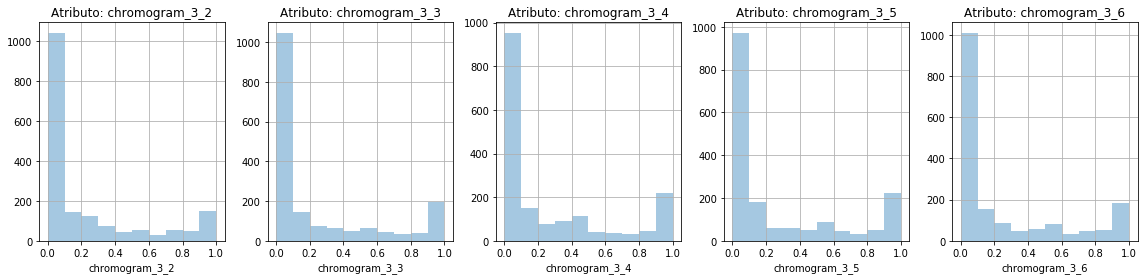

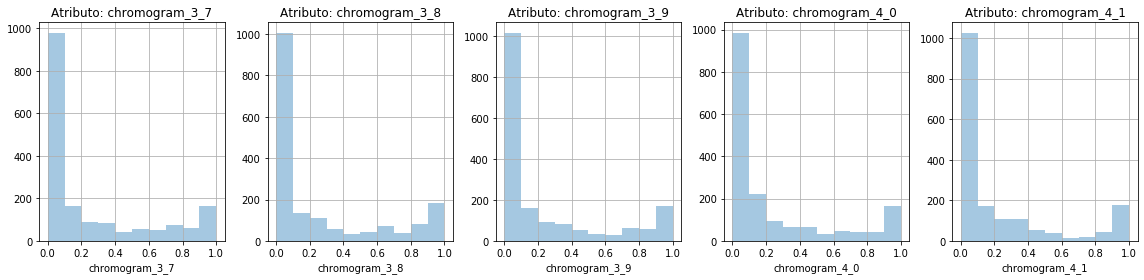

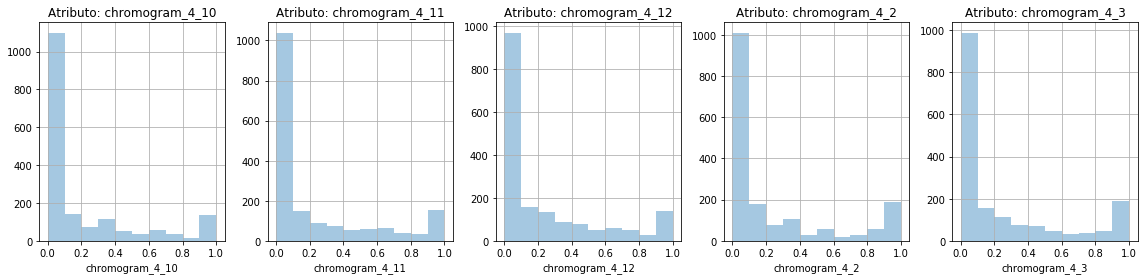

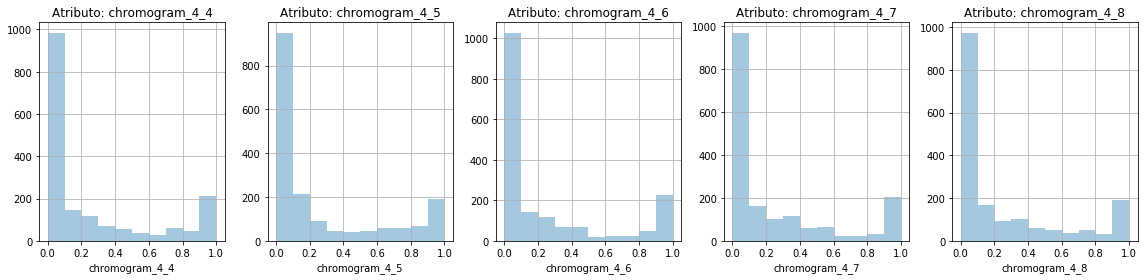

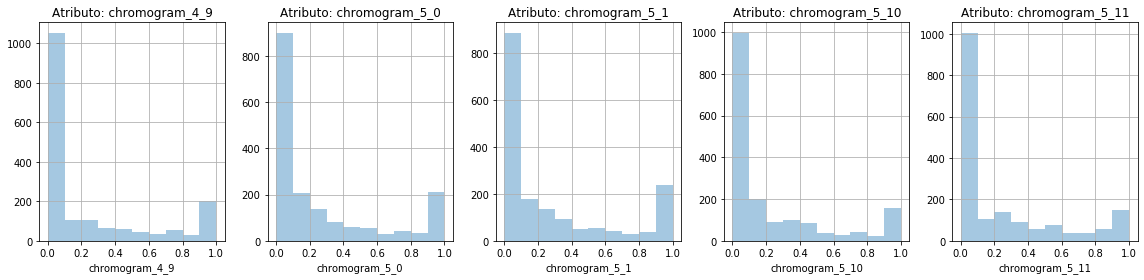

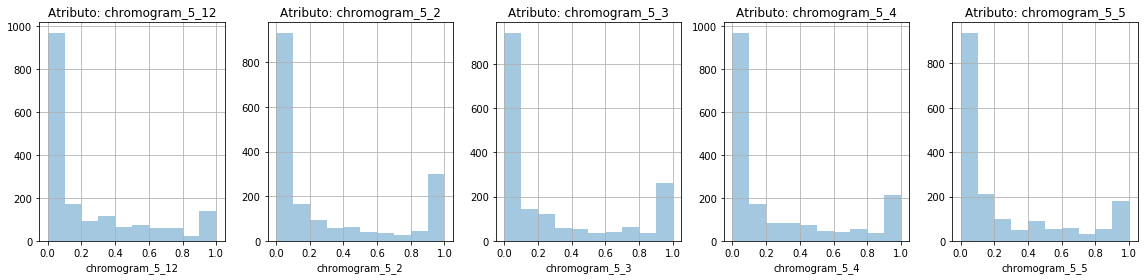

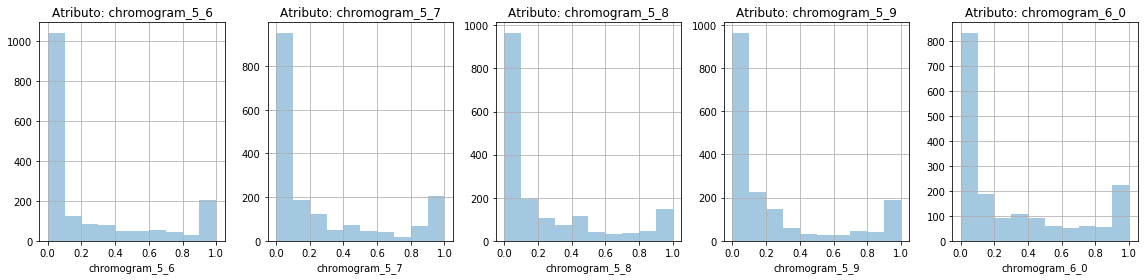

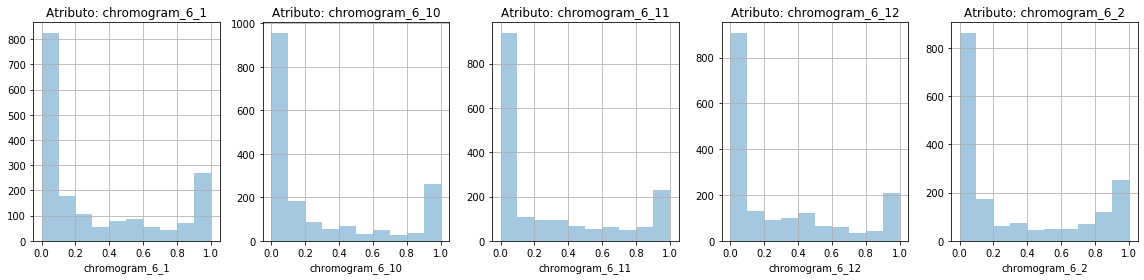

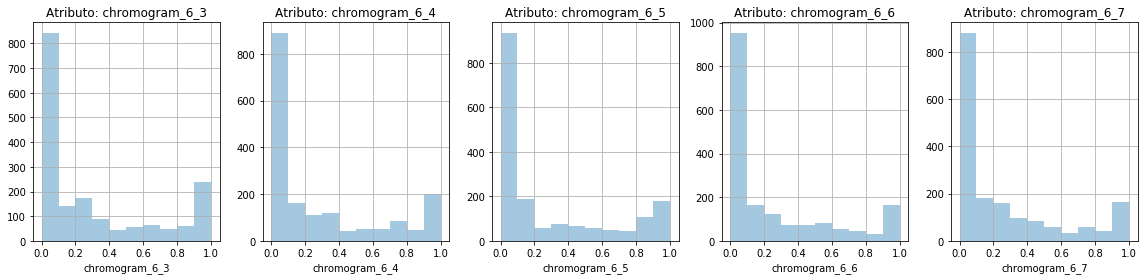

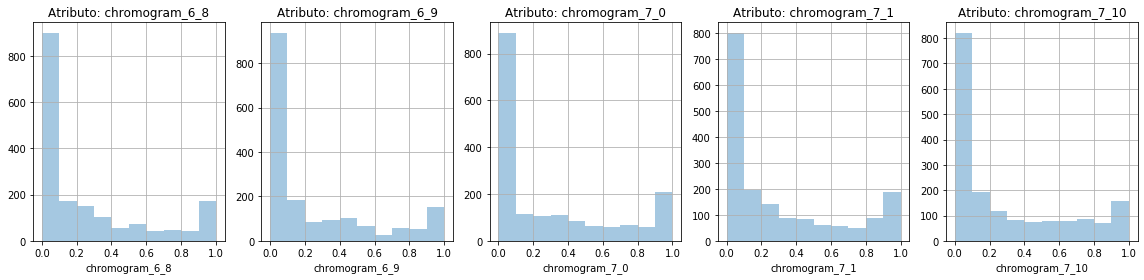

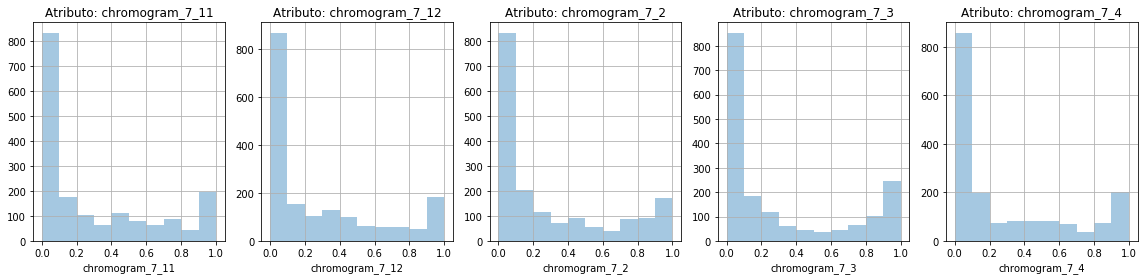

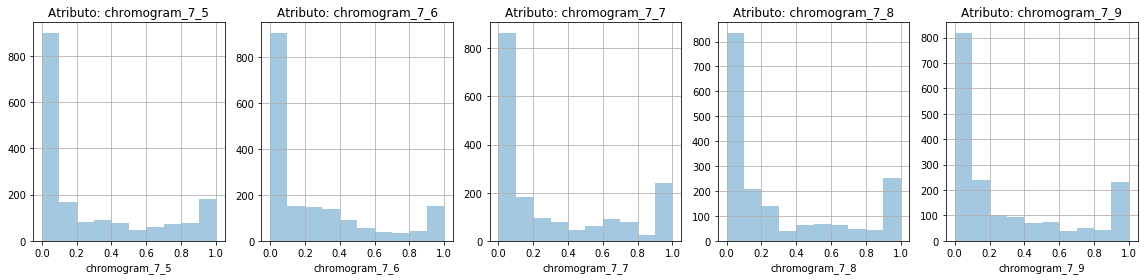

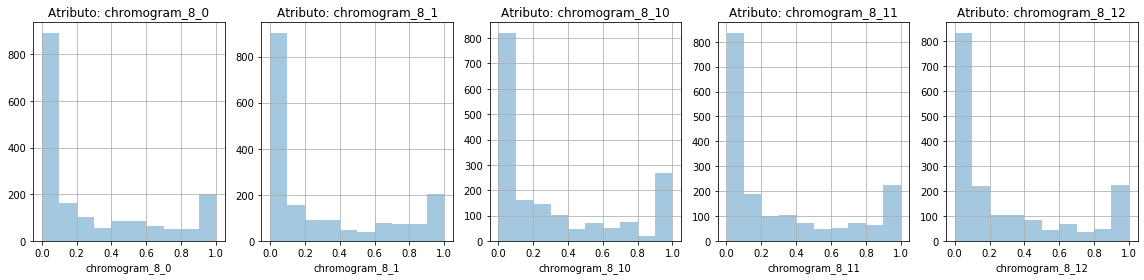

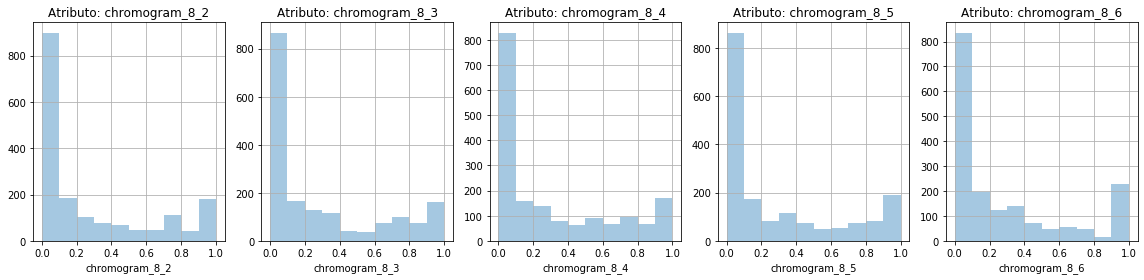

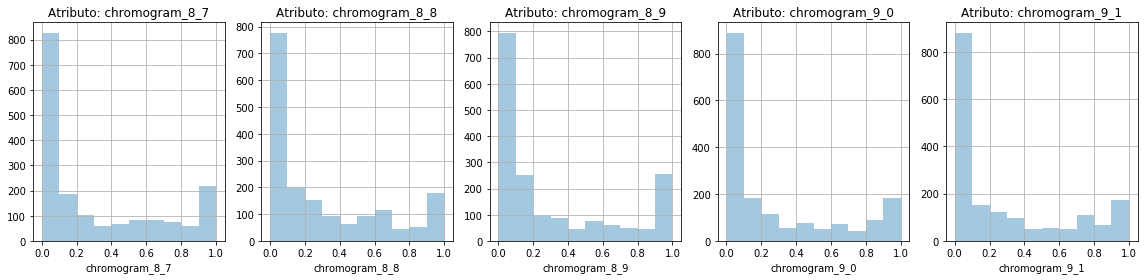

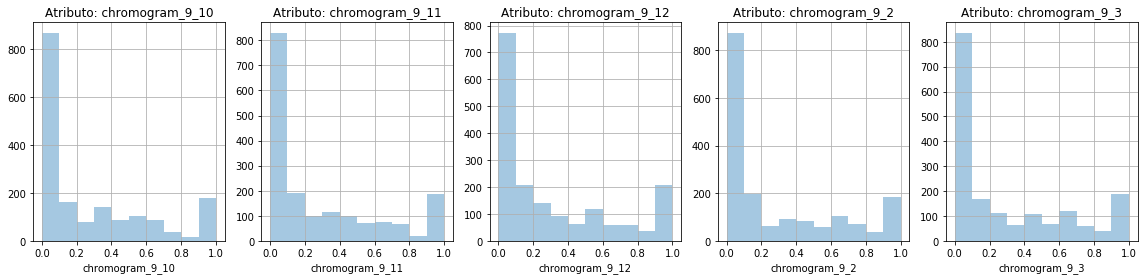

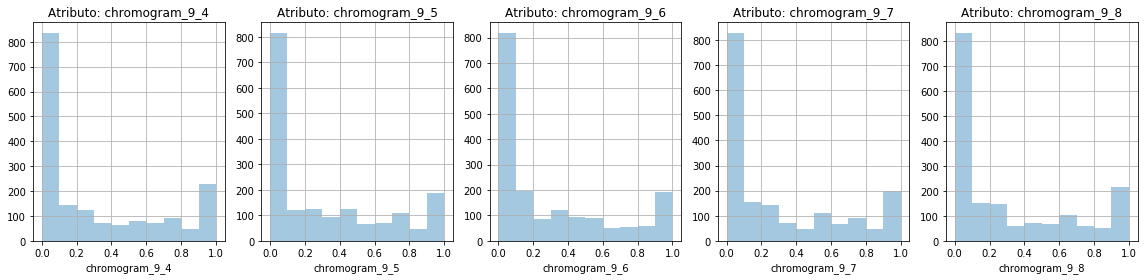

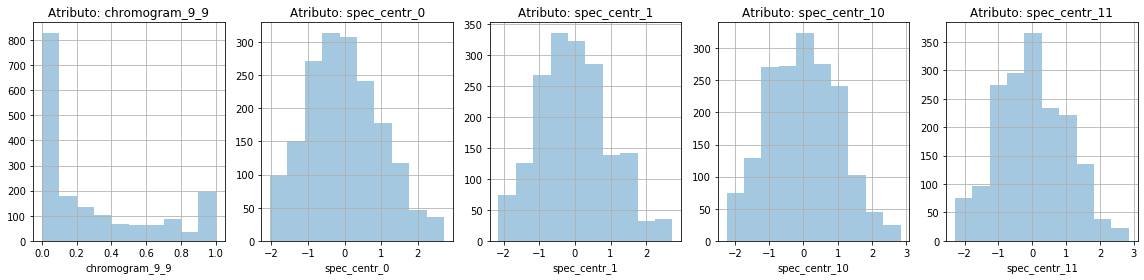

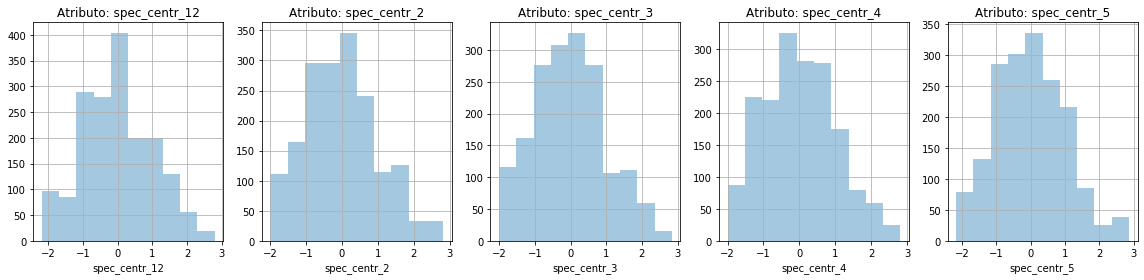

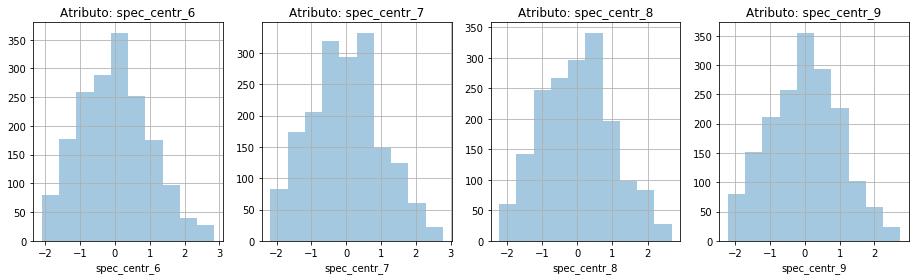

In [11]:
# Gráfico de histogramas de datos estandarizando variables spec_centr_k
plt.rcParams['figure.figsize']=[16,4]                        # Controla el tamaño del plot dentro del Notebook

x_tr_pre3=x_tr_st1.astype(float)

plt.suptitle('Distribución de cada característica',size=20,y=1.2)
k=1
for i in x_tr_pre3.columns[:]:
    plt.subplot(1,5,k)
    plt.title('Atributo: '+str(i))
    sns.distplot(x_tr_pre3[i],kde=False, bins=10)
    plt.tight_layout()
    plt.grid()
    if k==5:
        k=1
        plt.show()
    else:
        k+=1

**Comentarios:** se consideró esta opción debido a que el rango de los valores de los atributos chromogram difieren en gran magnitud con los valores de los atributos spec_centr

**Normalización de datos**

In [12]:
# Normalización de los Datos

# Normalización de x_tr
x_tr_norm =x_tr.astype(float)
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(x_tr_norm.values) 
x_tr_norm=pd.DataFrame(scaler_x.transform(x_tr_norm.values),columns=x_tr_norm.columns) # x_tr normalizado

# Estandarización de x_tst
x_tst_norm=x_tst.astype(float)
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(x_tst_norm.values)
x_tst_norm=pd.DataFrame(scaler_x.transform(x_tst_norm.values),columns=x_tst_norm.columns) # x_tst normalizado

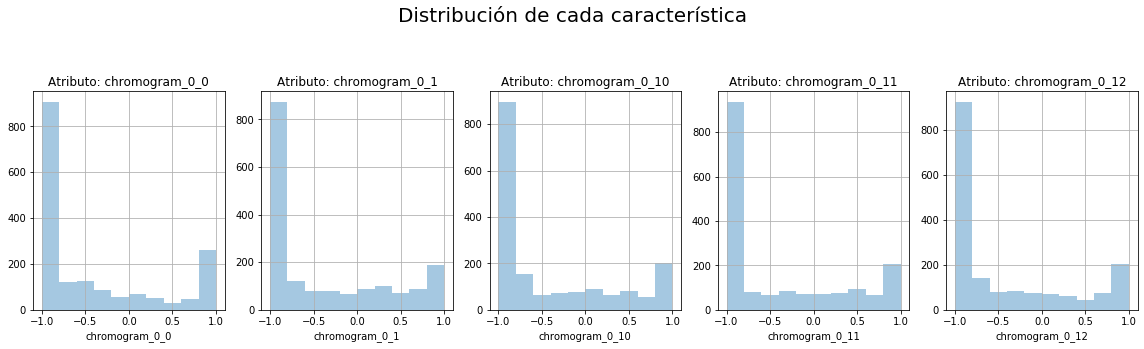

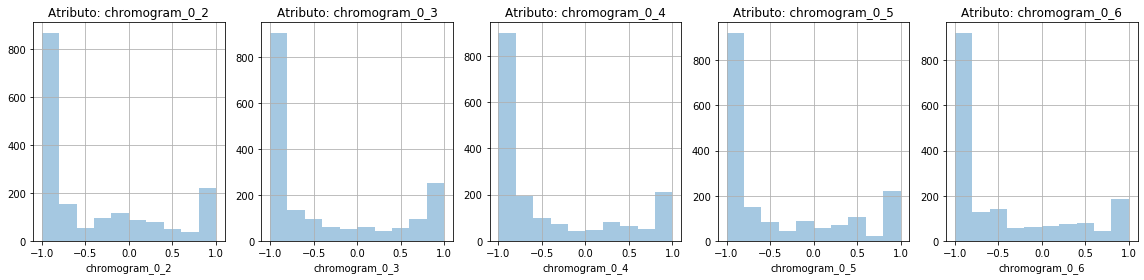

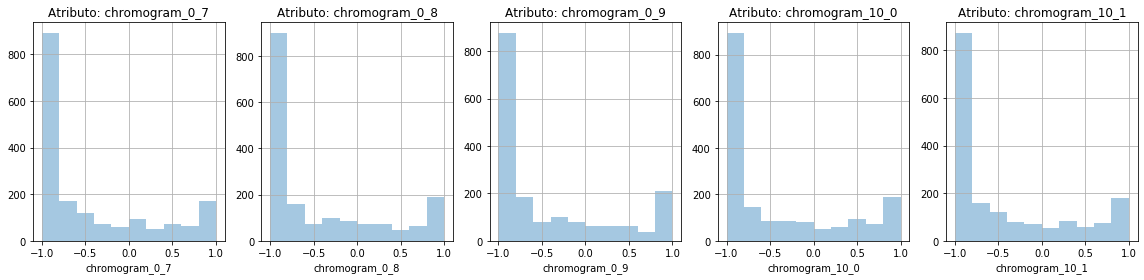

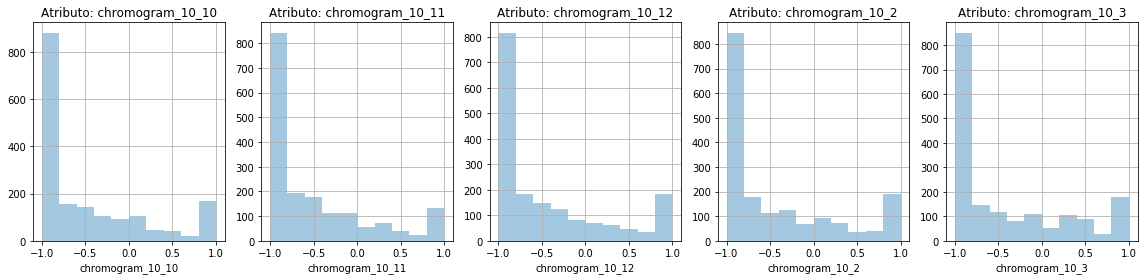

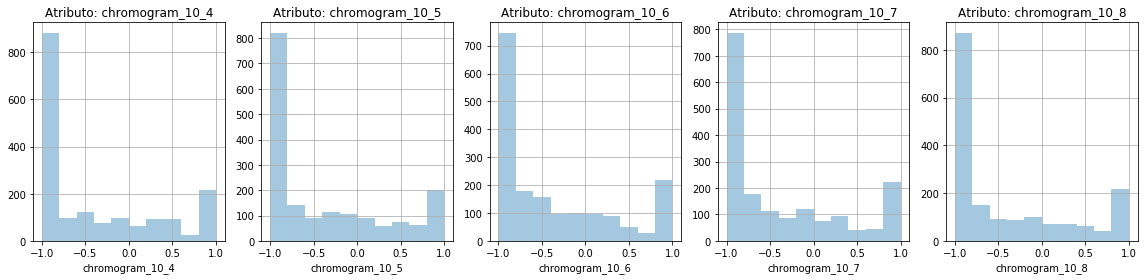

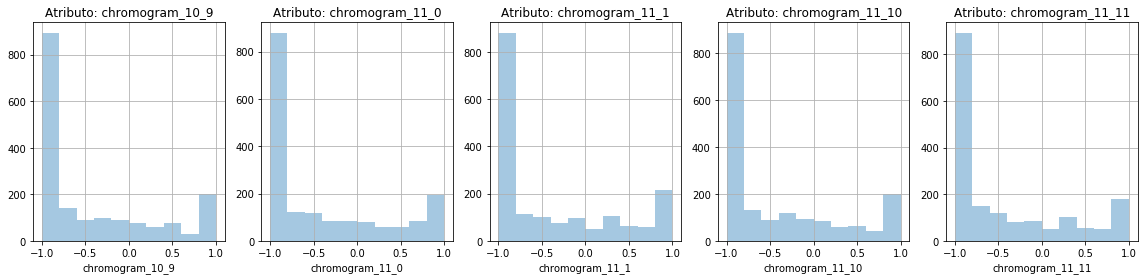

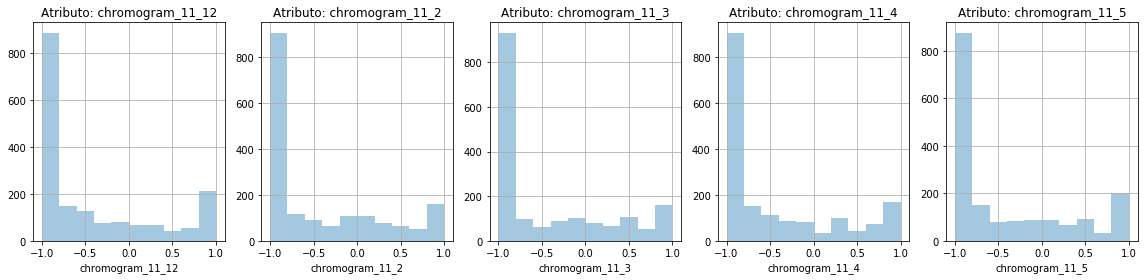

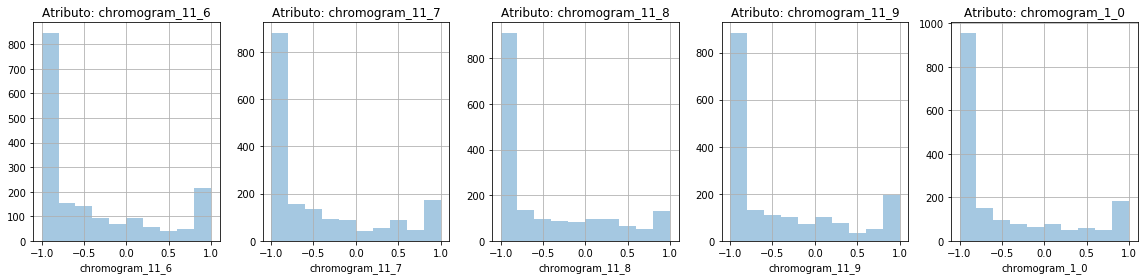

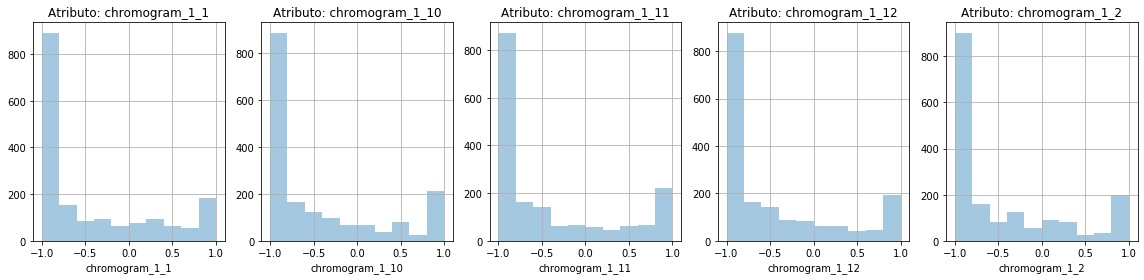

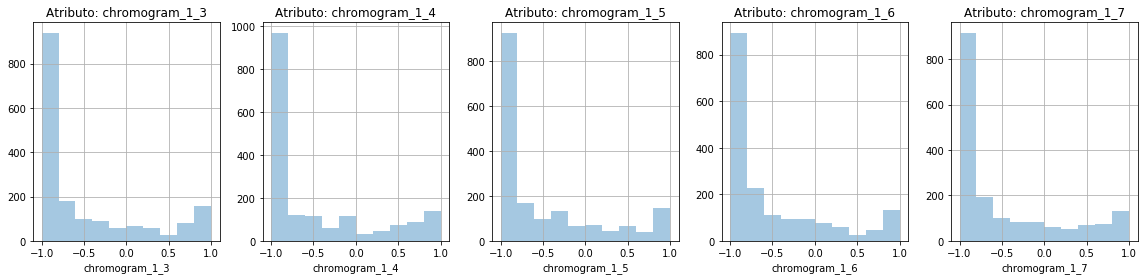

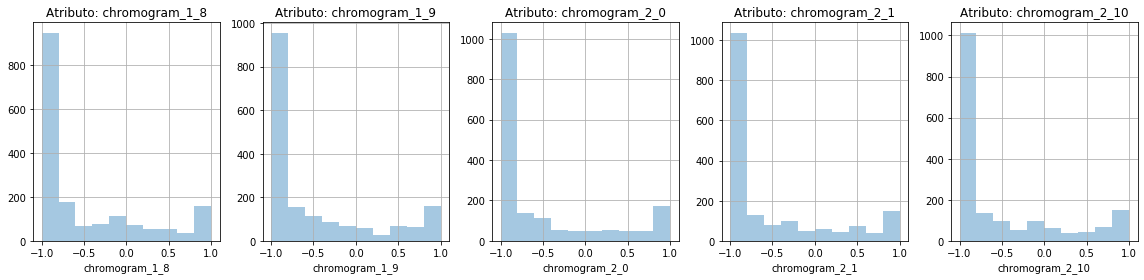

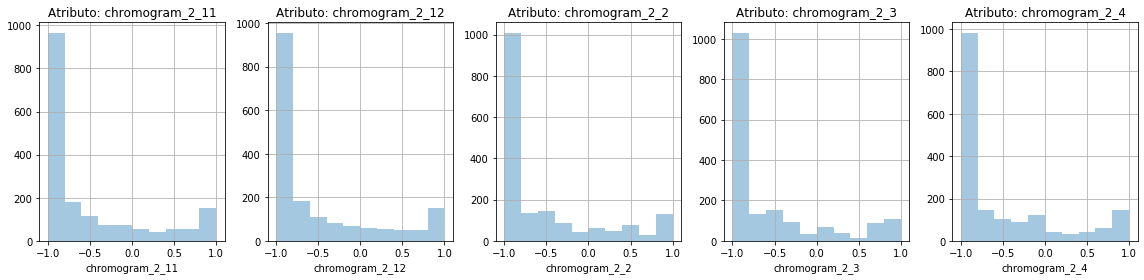

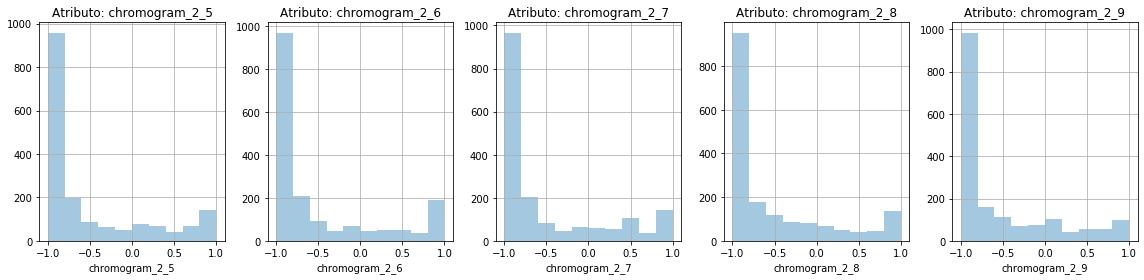

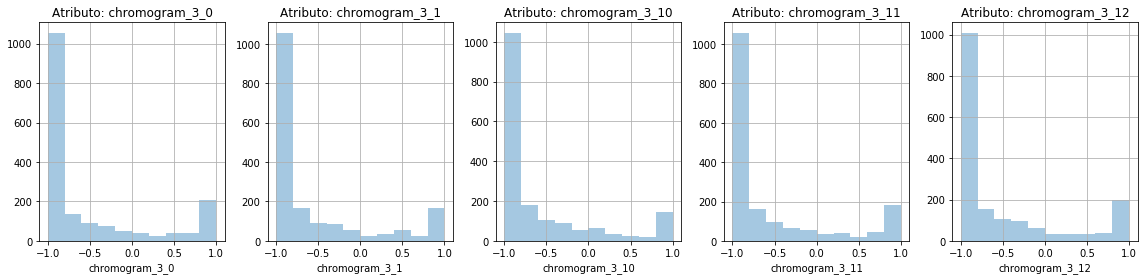

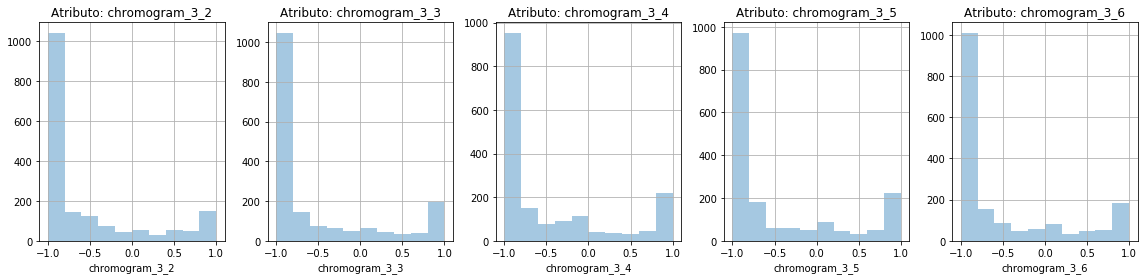

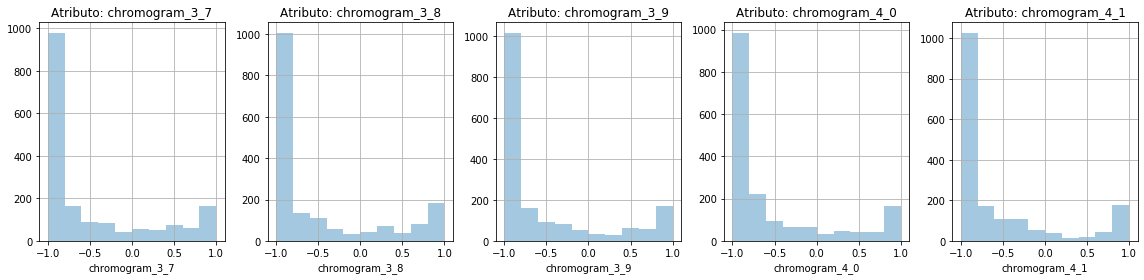

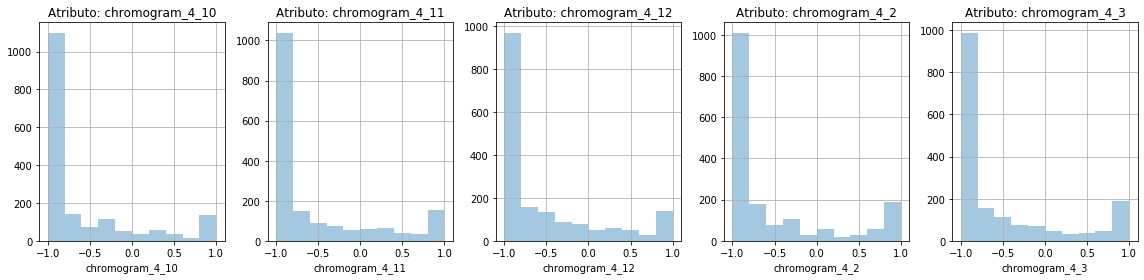

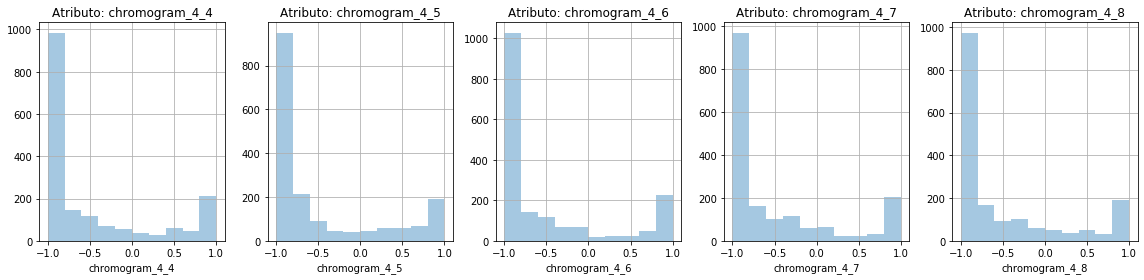

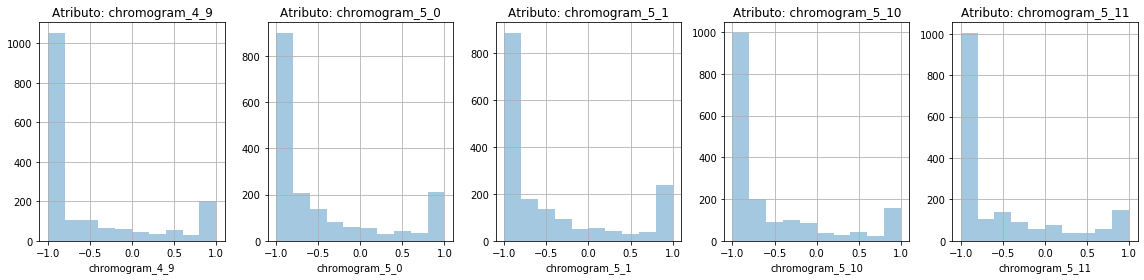

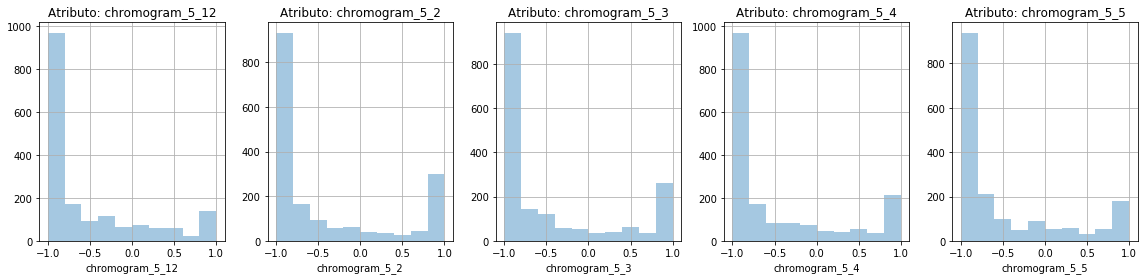

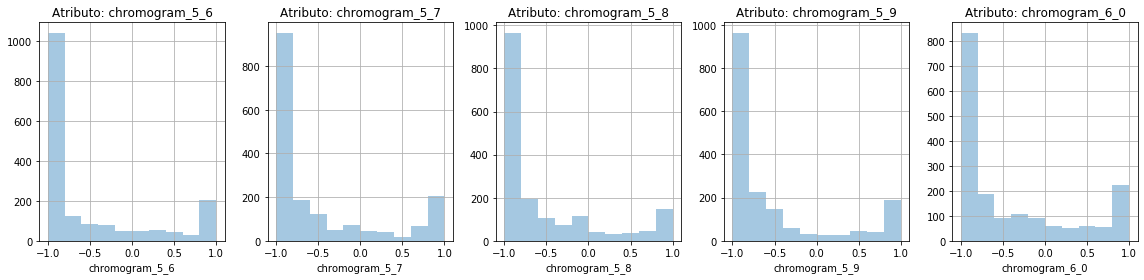

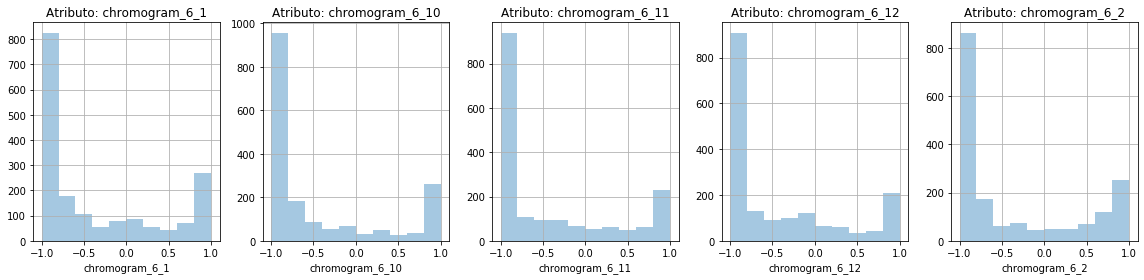

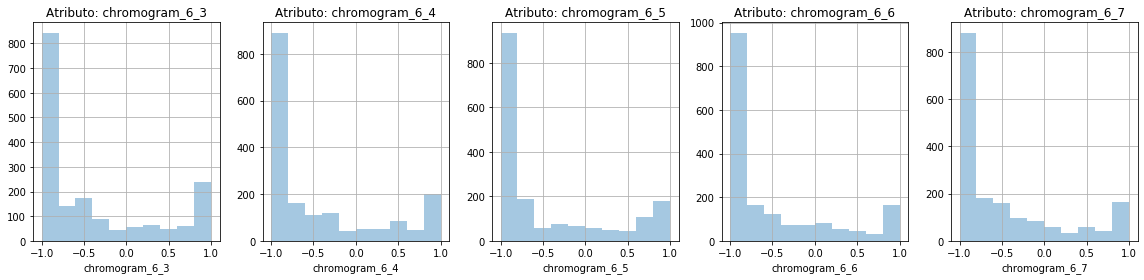

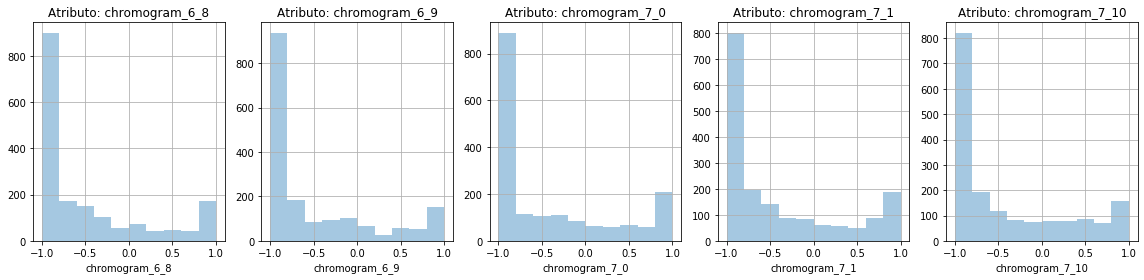

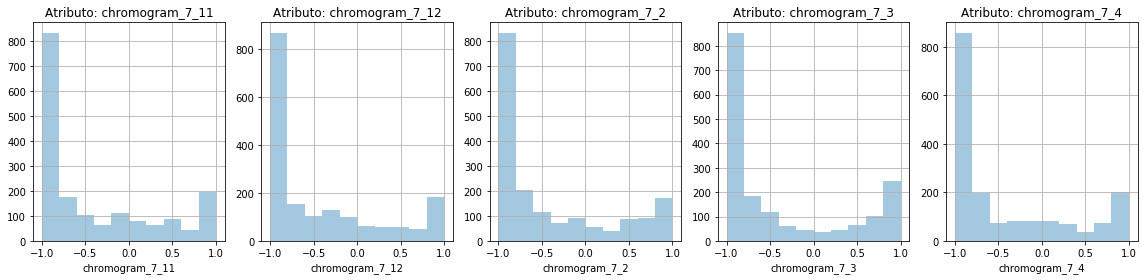

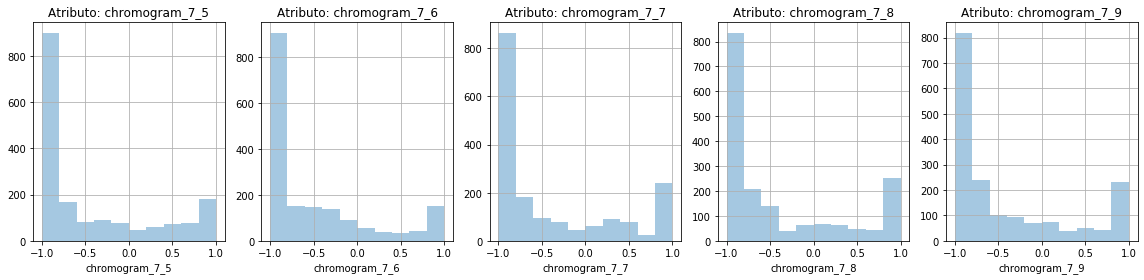

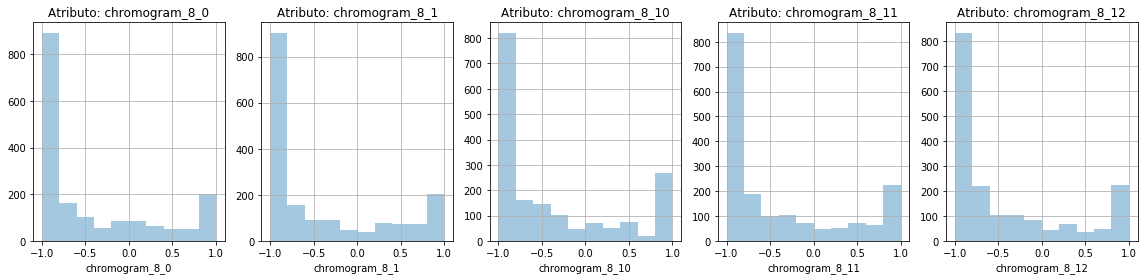

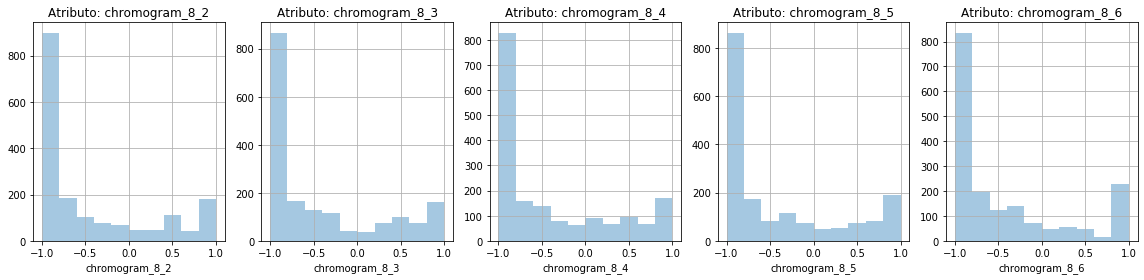

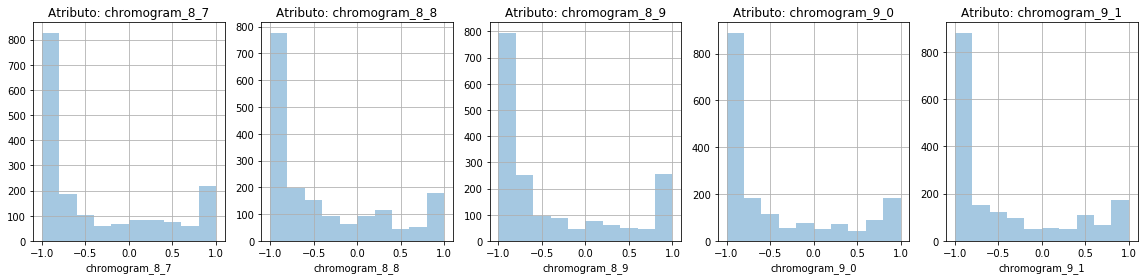

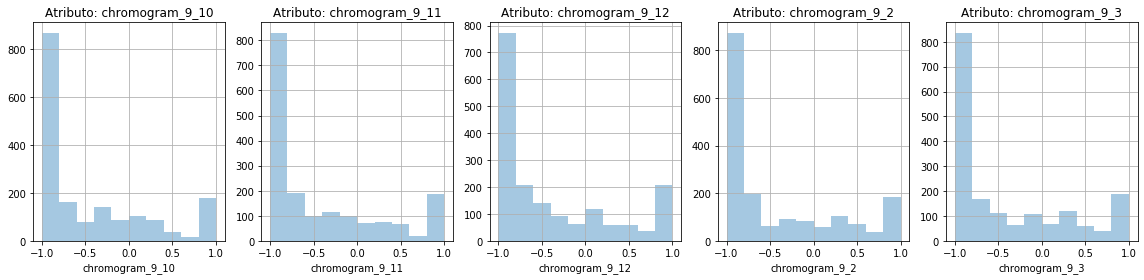

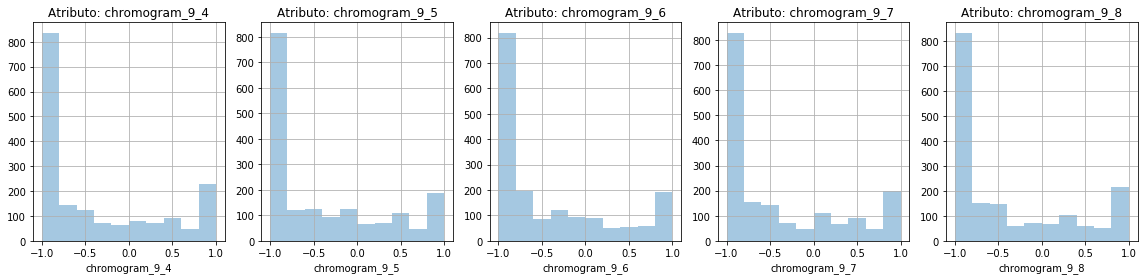

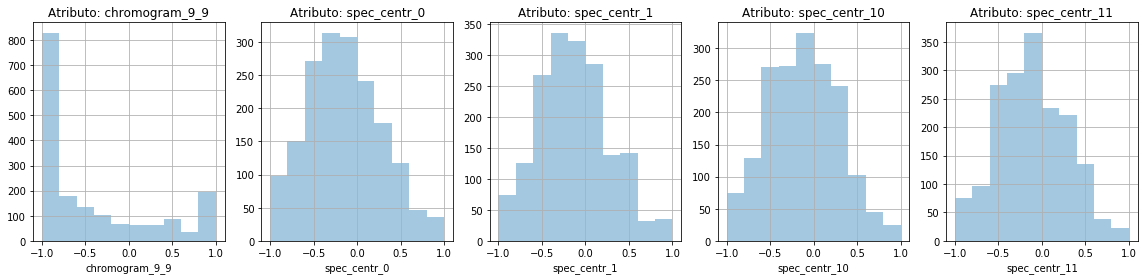

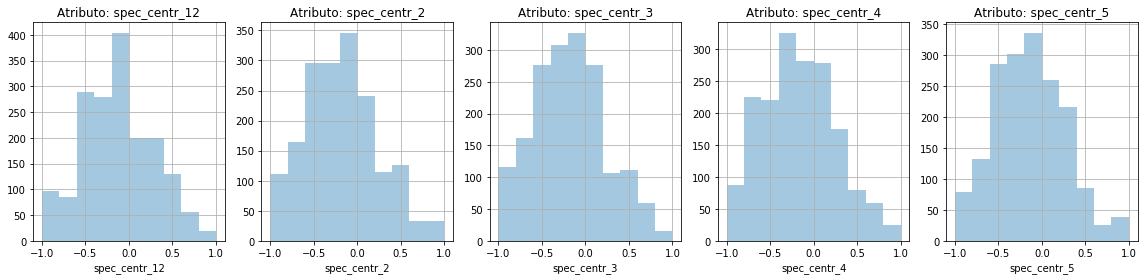

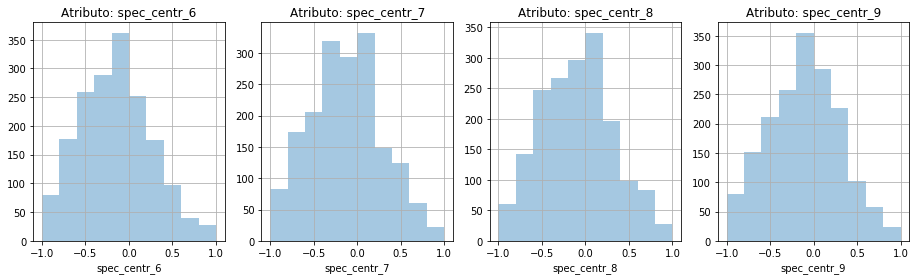

In [13]:
# Gráfico de histogramas de datos normalizados
plt.rcParams['figure.figsize']=[16,4]                        # Controla el tamaño del plot dentro del Notebook

x_tr_norm=x_tr_norm.astype(float)

plt.suptitle('Distribución de cada característica',size=20,y=1.2)
k=1
for i in x_tr_norm.columns[:]:
    plt.subplot(1,5,k)
    plt.title('Atributo: '+str(i))
    sns.distplot(x_tr_norm[i],kde=False, bins=10)
    plt.tight_layout()
    plt.grid()
    if k==5:
        k=1
        plt.show()
    else:
        k+=1

**Comentarios:** este pre-procesamiento de datos permitió dejar todos los atributos en el mismo rango de valores.

**Ajuste y Predicción para Datos no Estandarizados, estandarizados y solo estandarizando las variables spec_centr_k**

**Comentarios:** ahora dado que se tienen 3 tipos de pre-procesamiento distinto, se ajustará el modelo para cada pre-procesamiento de datos para cada clase mediante one vs all y así, concluir cual técnica se utilizará.

In [29]:
# Ajuste y predicción para variables estandarizadas
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000)
reg.fit(np.asarray(x_tr_st) ,y_tr)
pred=reg.predict(np.asarray(x_tst_st))
reg.score(x_tst_st,y_tst)

0.9746180680861302

In [30]:
# Ajuste y predicción para variables estandarizando spec_centr_k
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000)
reg.fit(np.asarray(x_tr_st1) ,y_tr)
pred=reg.predict(np.asarray(x_tst_st1))
reg.score(x_tst_st1,y_tst)

0.9686033922771563

In [31]:
# Ajuste y predicción para variables normalizadas
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000)
reg.fit(np.asarray(x_tr_norm) ,y_tr)
pred=reg.predict(np.asarray(x_tst_norm))
reg.score(x_tst_norm,y_tst)

0.9760014435221942

**Comentarios:** si bien los resultados para los tres tipos de pre-procesamiento son muy similares. Se utilizará dicha técnica de estandarización para continuar con la tarea.

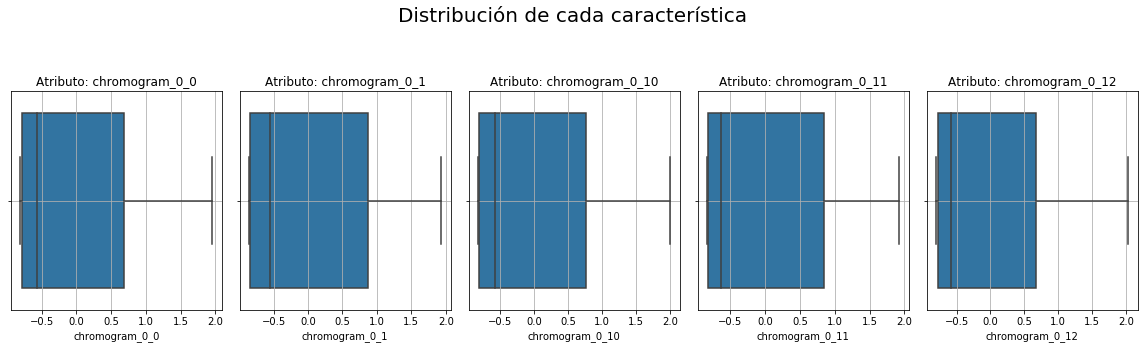

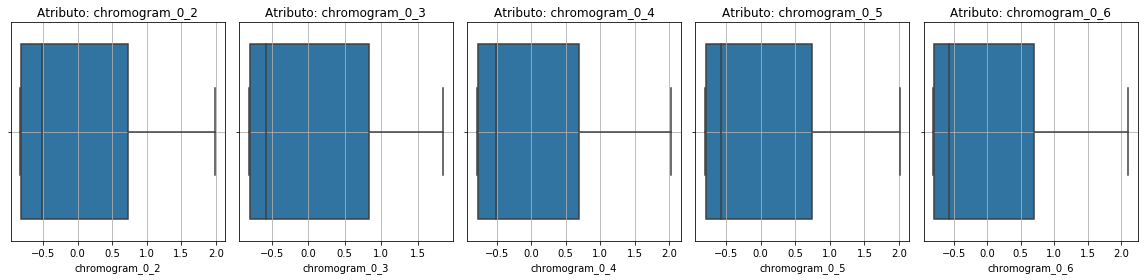

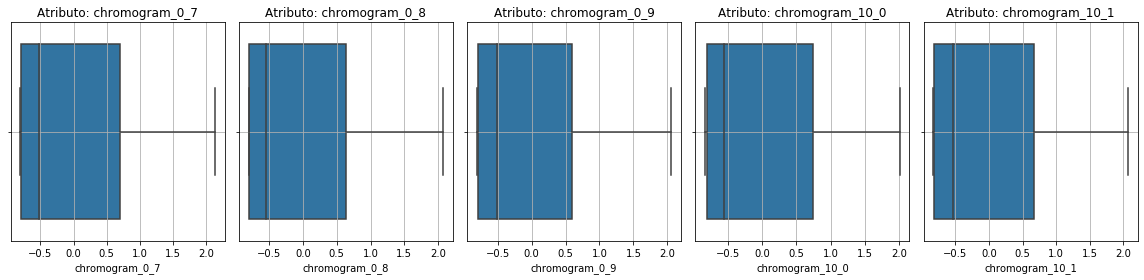

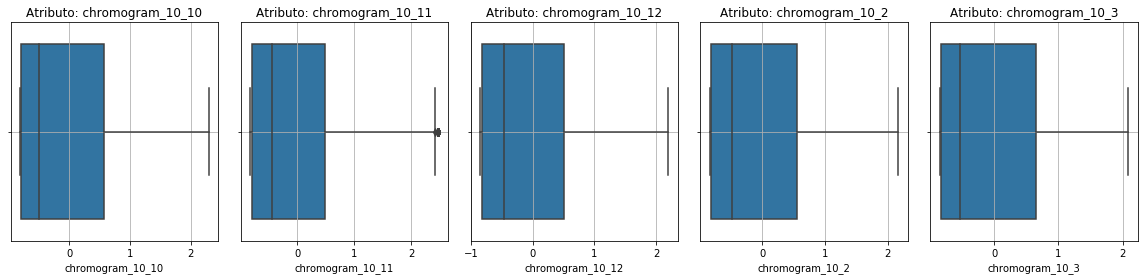

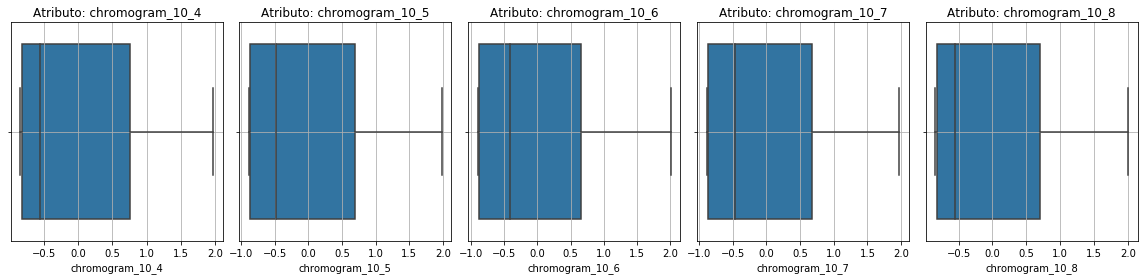

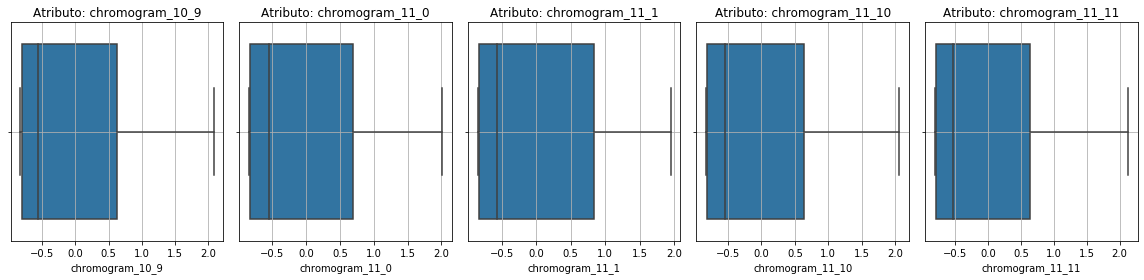

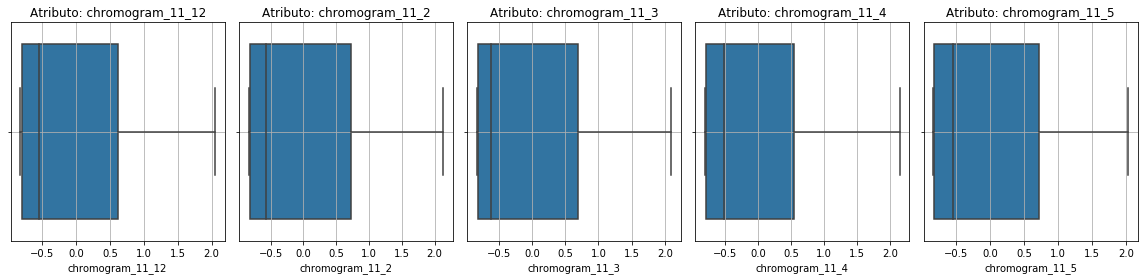

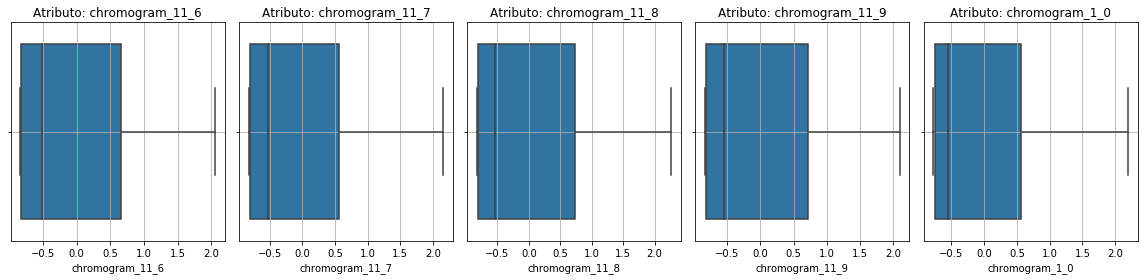

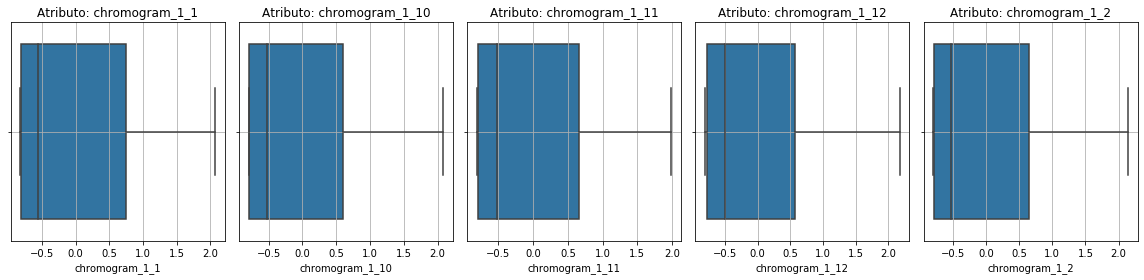

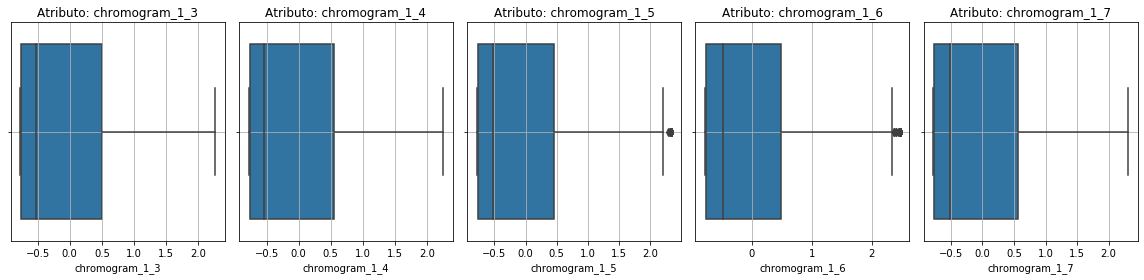

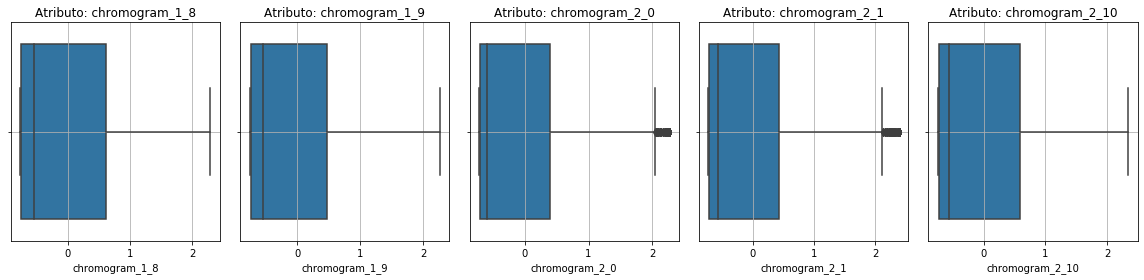

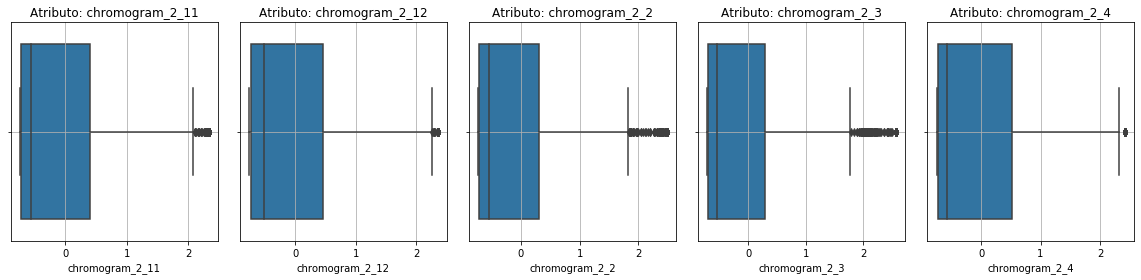

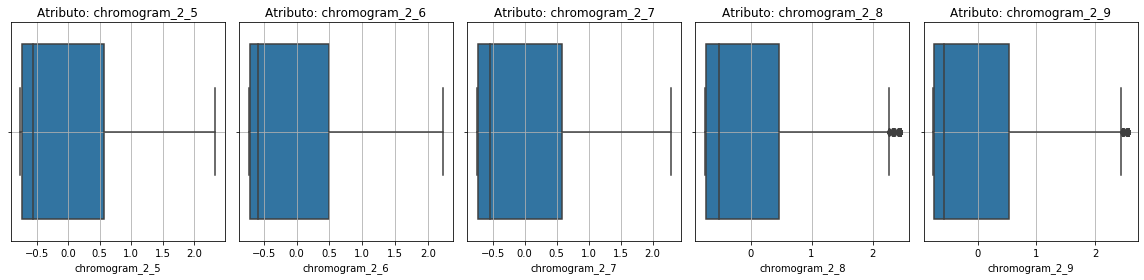

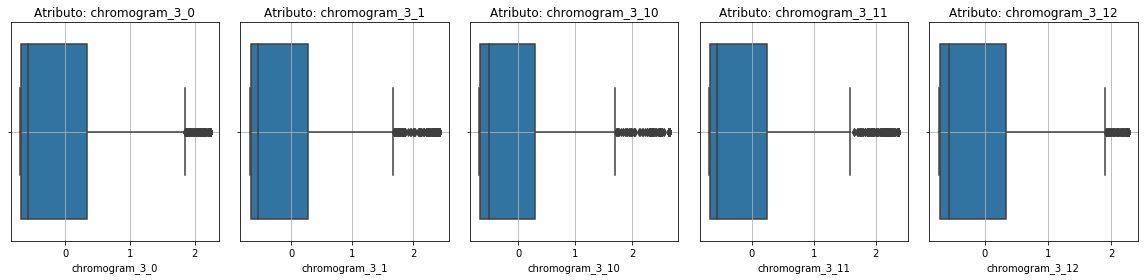

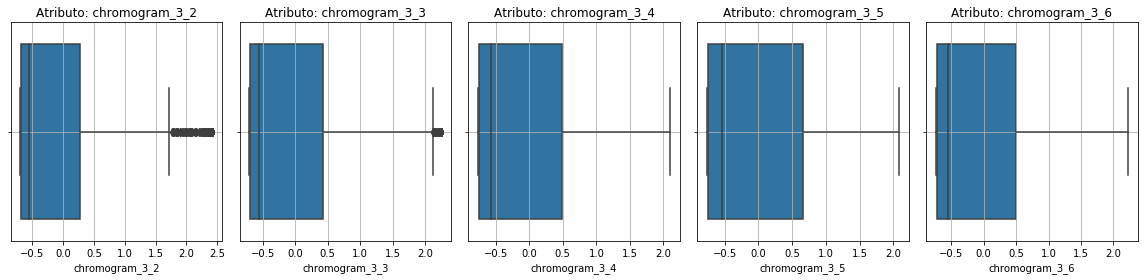

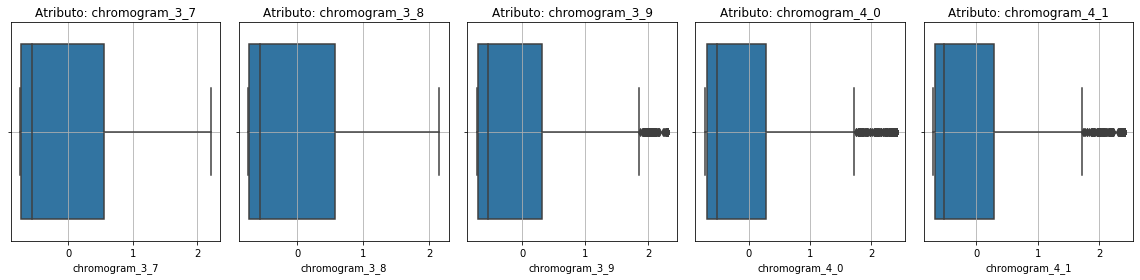

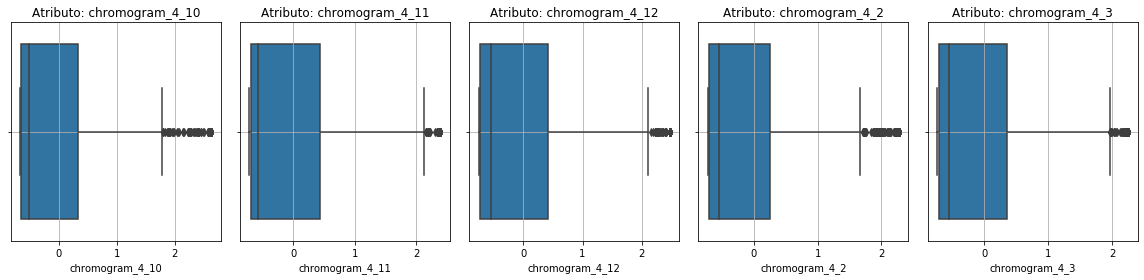

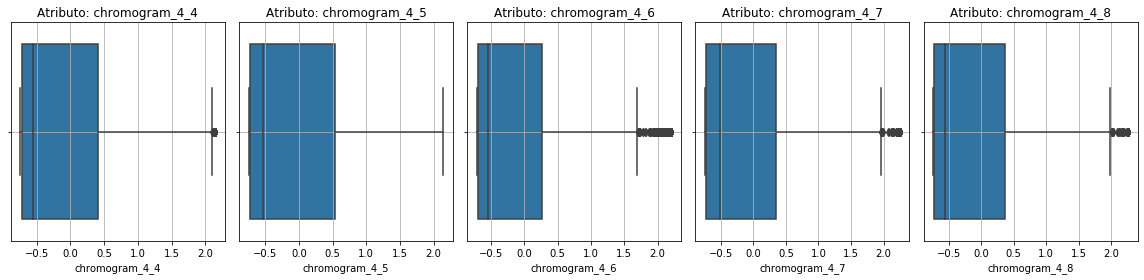

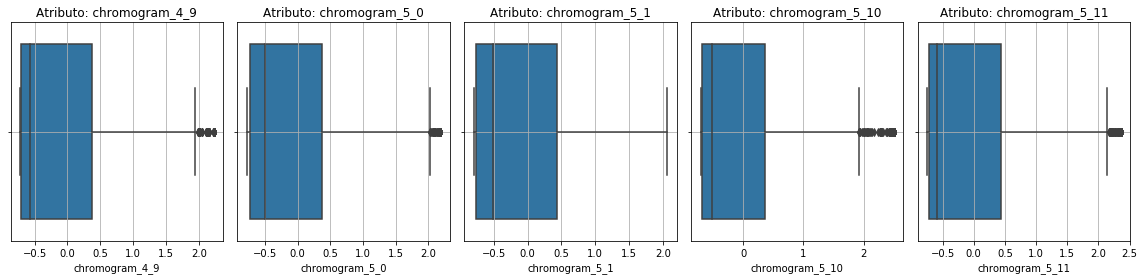

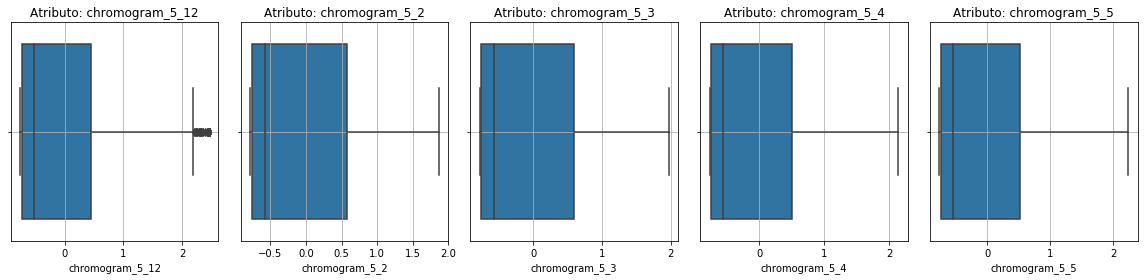

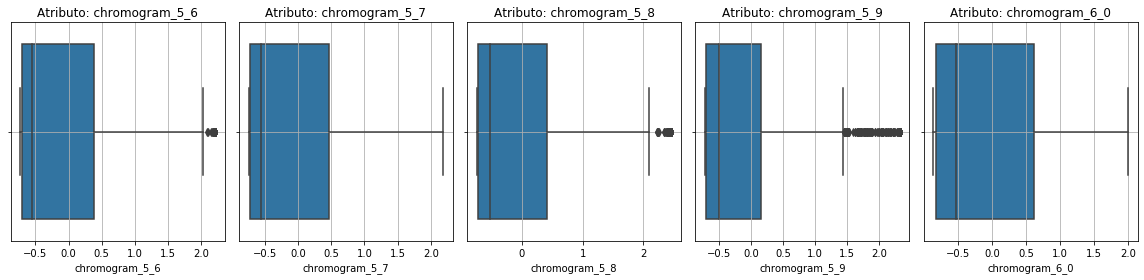

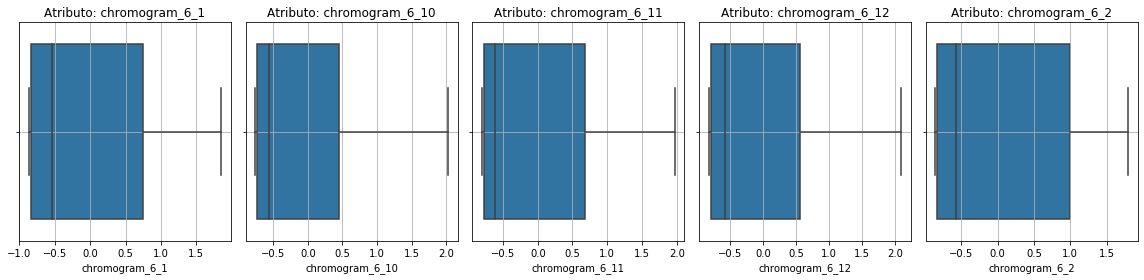

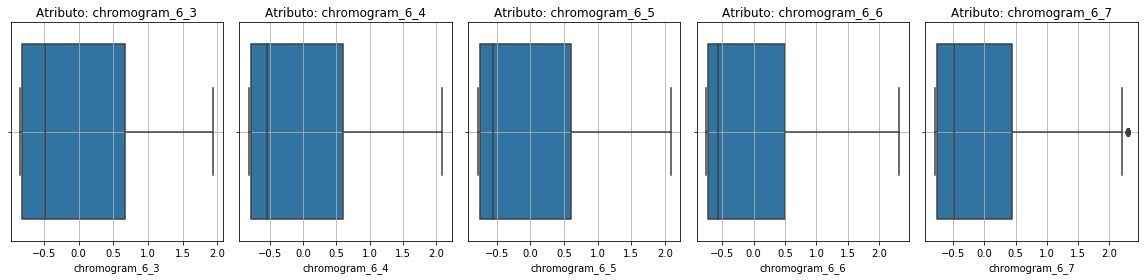

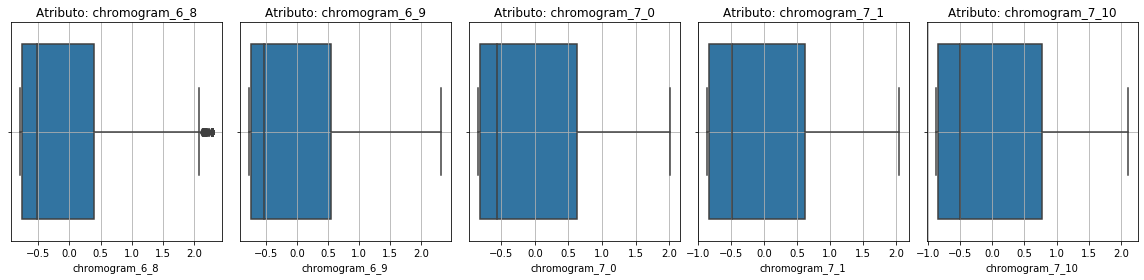

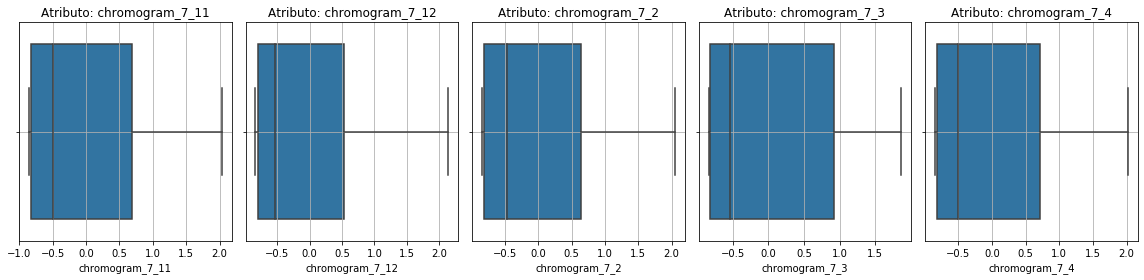

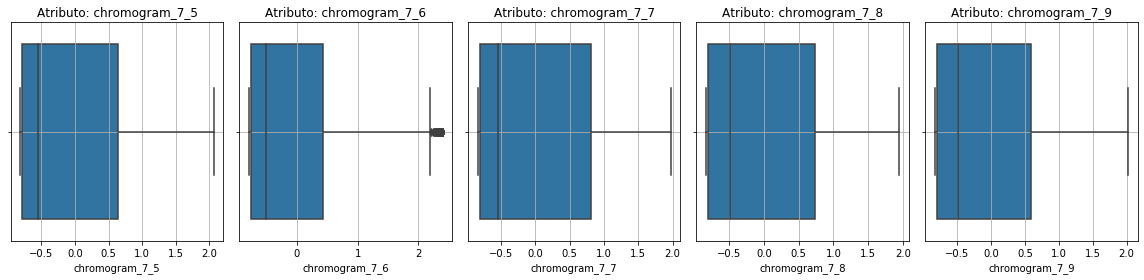

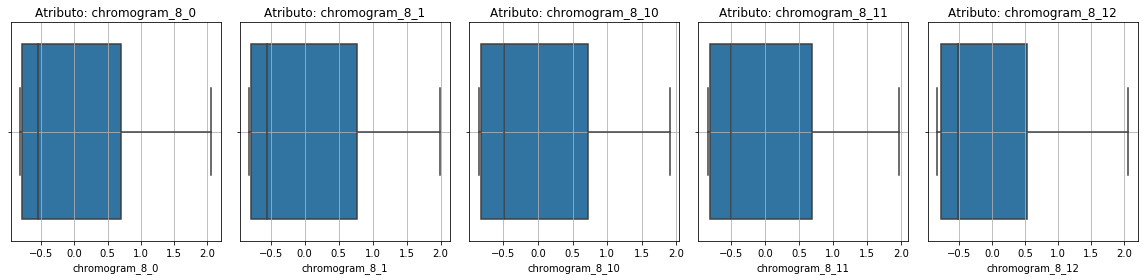

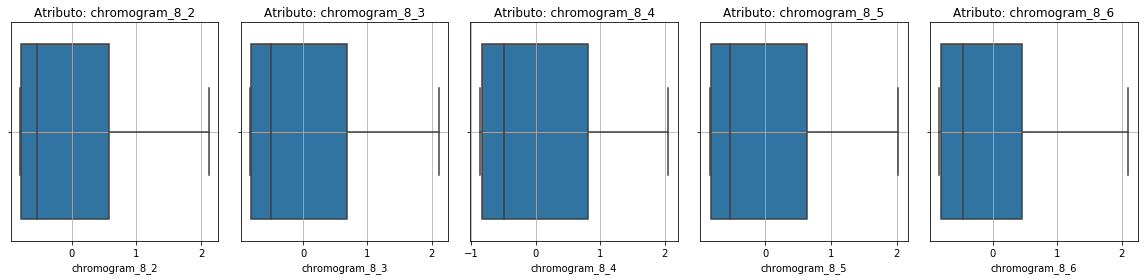

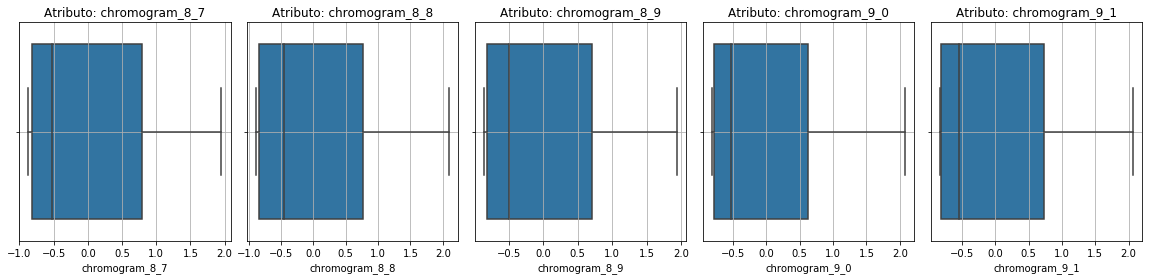

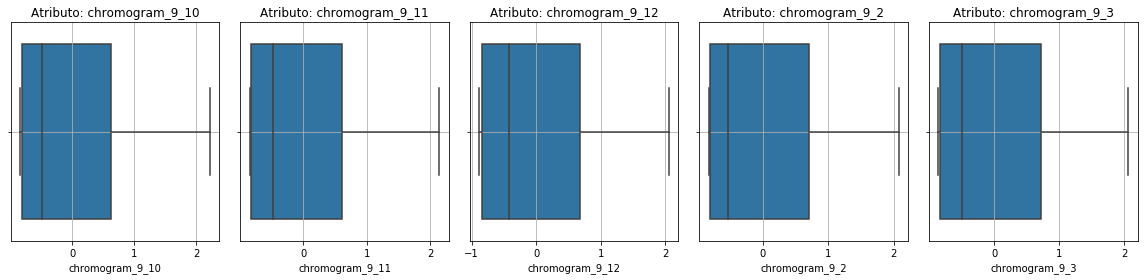

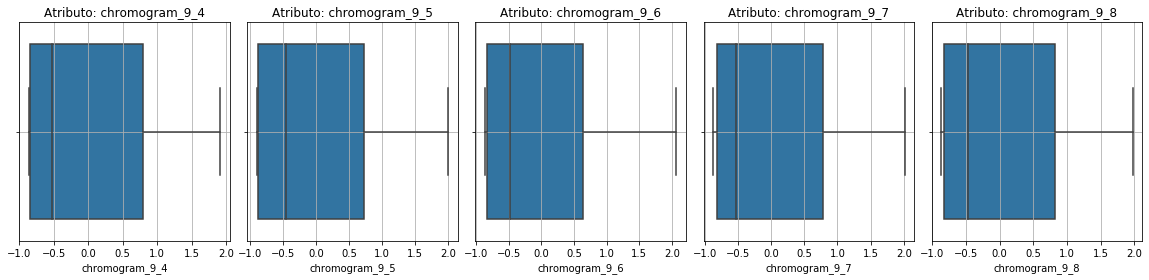

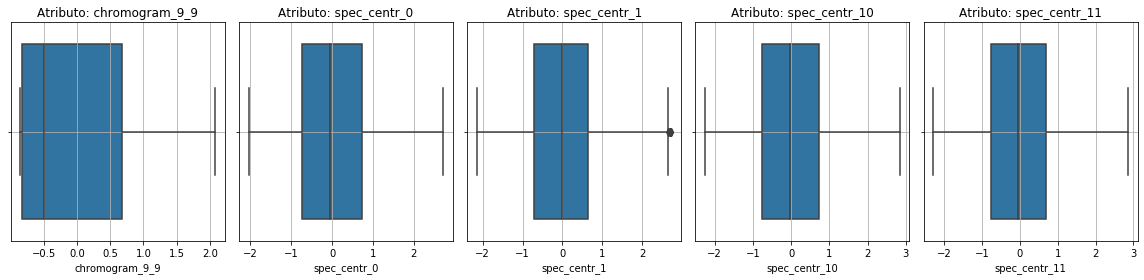

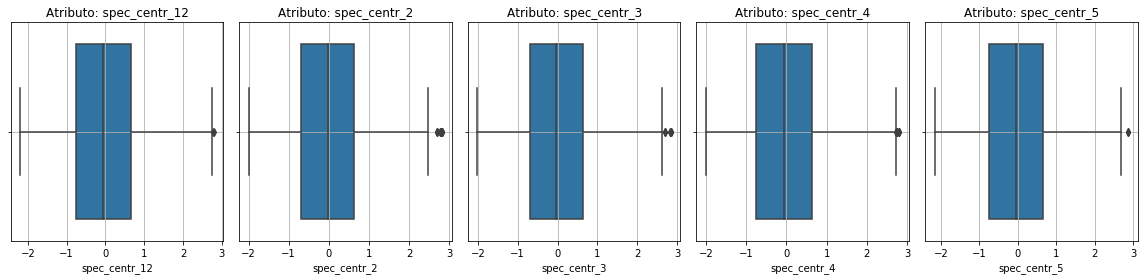

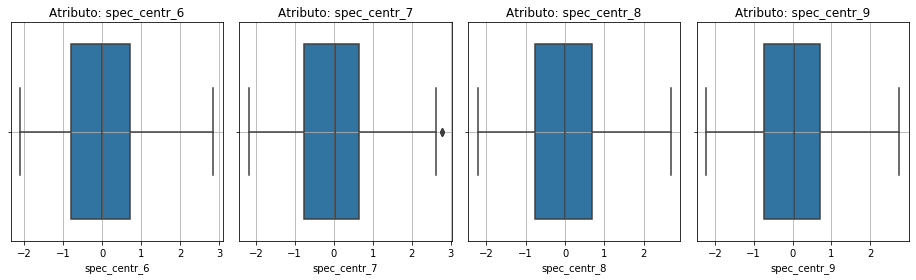

In [18]:
# Gráfico de caja de datos estandarizados
plt.rcParams['figure.figsize']=[16,4]                        # Controla el tamaño del plot dentro del Notebook

x_tr_st=x_tr_st.astype(float)

plt.suptitle('Distribución de cada característica',size=20,y=1.2)
k=1
for i in x_tr_st.columns[:]:
    plt.subplot(1,5,k)
    plt.title('Atributo: '+str(i))
    sns.boxplot(x_tr_st[i])
    plt.tight_layout()
    plt.grid()
    if k==5:
        k=1
        plt.show()
    else:
        k+=1

**Comentarios:** se puede apreciar que si bien existen outliers en los datos, no es una tendencia en todas los atributos. 

#### 3.c Selección de Atributos by hand

En esta parte comenzaremos entrenando un modelo sin ningún atributo y luego iremos agregando 1 a 1 el atributo que más mejora los resultados de la predicción. En cada paso validaremos qué atributo es el mejor utilizando 5-fold como aprendió en la pregunta 1. Para el modelo sin ningún atributo utilizaremos una predicción constante igual a la especie + género más repetida en el conjunto de entrenamiento. Luego, en cada iteración, evaluaremos cada uno de los atributos restantes, viendo cual reduce más el error. El error ha utilizar para esta pregunta será de libre elección, busque loss functions for classifications en internet, ocupe alguna implementada en sklearn o implemente alguna usted. Luego de elegido un atributo, lo agregaremos a la lista de atributos a utilizzar y continuamos iterando hasta agotar los atributos restantes. Guarde los errores promedio a medida va agregando atributos al modelo y guarde la lista de los atributos que fue agregado, luego grafique el error promedio en función del número de atributos seleccionados. ¿Cuál es el modelo que entrega un menor error de validación (cuál es su lista de atributos)?

Debido al análisis del gráfico anterior, se utilizarán los **todos los datos estandarizados x_tr_st y x_tst_st**

La función de costo se obtuvo de https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

In [23]:
restantes      =  list(x_tr_st.columns)                        # Lista de todos los atributos
actuales       =  []                                           # Lista para atributos seleccionados                                      
error_actual   =  float('inf')
error_final    =  pd.DataFrame()                                    
error_atributo =  pd.DataFrame()
folds          =  StratifiedKFold(5)                           # Permite separar folds con clases equiparadas
error_train    =  pd.DataFrame()                               # Para guardar el error sobre Tr
error_tr       =  []
error_tr_final =  pd.DataFrame()

while restantes:
    for atributo_candidato in restantes:
        error_fold  =  []
        error_tr    =  []
        x_atributos =  pd.DataFrame(x_tr_st[actuales+[atributo_candidato]])
        for train_index, val_index in folds.split(x_atributos,y_tr):
            y_tr_fold   =  y_tr[train_index]
            y_val_fold  =  y_tr[val_index]
            x_tr_fold   =  x_atributos.loc[train_index,:]
            x_val_fold  =  x_atributos.loc[val_index,:]
            reg         =  LogisticRegression()
            
            #Entrenar el Modelo
            reg.fit(np.asarray(x_tr_fold),y_tr_fold)

            # Calcular error del Modelo
            pred_tr  = reg.predict_proba(np.asarray(x_tr_fold))                    
            error_tr.append(log_loss(y_tr_fold,pred_tr,eps=1e-15))          # Error sobre Train Set
            pred     = reg.predict_proba(np.asarray(x_val_fold))                     
            error_fold.append(log_loss(y_val_fold,pred,eps=1e-15))          # Error sobre Validation Set
        
        # Selecciona la mediana de los errores de los 5 fold
        error_atributo.loc[0,atributo_candidato] = np.mean(error_fold)
        error_train.loc[0,atributo_candidato]    = np.mean(error_tr)
    
    # Encuentra el mínimo error de todos los atributos
    atributo = error_atributo.iloc[0].idxmin()
    
    # Guarda el error correspondiente asociado al atributo candidato
    if error_atributo.loc[0,atributo] <= error_actual:
        error_actual                   =  error_atributo.loc[0,atributo]
        error_final.loc[0,atributo]    =  error_actual
        error_tr_final.loc[0,atributo] =  error_train.loc[0,atributo]
        actuales.append(atributo)
        restantes.remove(atributo)
        error_atributo                 =  pd.DataFrame()
        error_train                    =  pd.DataFrame()
        
        if len(actuales) >= 5:    # Se coloca número límite por tiempo
            break
    # Se incorpora este break por si se genera un error mayor al error actual
    else:
        break
    print(len(actuales),len(restantes),error_actual)

1 168 3.895462943548747
2 167 3.535317118782525
3 166 3.222567909311086
4 165 2.930371155069029


#### 3.d Validar

Utilizando la lista de atributos que calculó en la pregunta anterior, realice un gráfico de cómo varía el error de entrenamiento (error sobre x_tr) y de validación (sobre x_val) a medida que va agregando los atributos. Comente cómo sus hallazgos se relacionan con lo aprendido teóricamente

Text(0, 0.5, 'Scores')

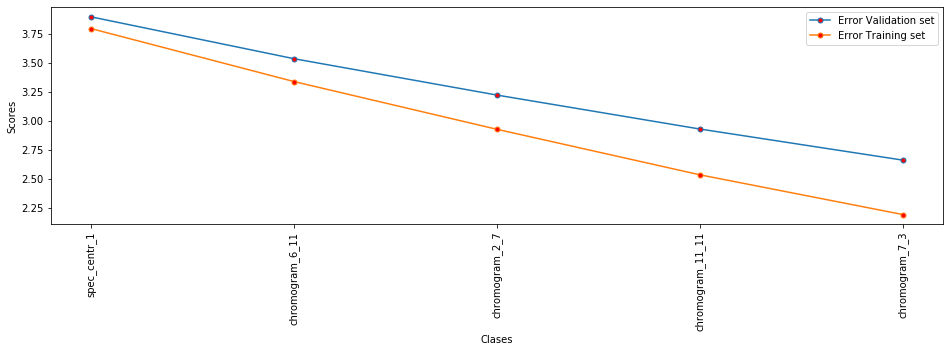

In [24]:
# Gráfico de error
plt.rcParams['figure.figsize']=[16,4]  
plt.plot(actuales,error_final.loc[0,:], marker='o', ms=5, mfc='red', label = 'Error Validation set')
plt.plot(actuales,error_tr_final.loc[0,:], marker='o', ms=5, mfc='red',label = 'Error Training set')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Clases')
plt.ylabel('Scores')

**Comentarios:** se puede ver que el ambos errores en cada selección de atributo disminuye, esto debido a que la incorporación de cada atributo permite un mejor ajuste del modelo. Por otro lado, también se puede apreciar que el error de training es menor que el error de validación debido a que el conjunto de training es con el que se ajusta el modelo.

El gráfico anterior permite ver que el modelo solo utilizó 5 atributos para obtener dichas conclusiones, por temas de tiempo, pero se puede apreciar que el error con 5 atributos disminuye considerablemente.

#### 3.e Mutual Information

Calcule la información Mutual para nuestros datos. Note que esta función ya esta implementada. ¿Qué información puede obtener de estos resultados?¿Concuerda los valores encontrados con lo encontrados en la pregunta anterior?

In [ ]:
from sklearn.feature_selection import mutual_info_regression
MI = list(zip(mutual_info_regression(x_tr,y_train),x_tr_st.columns))

Text(0, 0.5, 'MI')

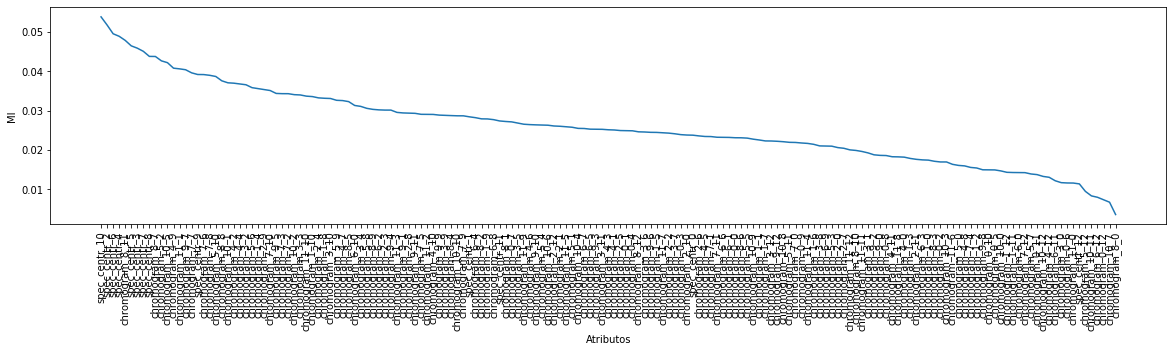

In [53]:
#Gráfico de Mutual Information
MI = pd.DataFrame(MI, columns=['MI','Atributo']).sort_values('MI',ascending=False)

plt.rcParams['figure.figsize']=[20,4]  
plt.plot(MI['Atributo'],MI['MI'])
plt.xticks(rotation=90)
plt.xlabel('Atributos')
plt.ylabel('MI')

**Comentarios:** 

El cálculo de la información mutual es una especie de correlación entre las variables, la cual no es lineal. Esto permite calcular que tan informativa es una variable respecto a las otras, donde constra mayor sea el score, más relacionadas están y si el score es 0 implica que las variables son independientes. 

A partir del gráfico anterior se puede apreciar que las variables más correlacionadas son las spec_centr_k y luego, las chromogram_i_j, donde aparecieron algunas en la selección de atributos a mano.

Se puede ver que la cantidad de atributos que aportan al modelo son varias, por lo tanto una buena solución seria volver a seleccionar los atributos a mano pero con más tiempo.